In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Latihan Bootcamp Indonesia AI Batch 5/Dataset/Fraud Detection/fraudTrain.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Latihan Bootcamp Indonesia AI Batch 5/Dataset/Fraud Detection/fraudTest.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df_train.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


In [ ]:
df_train.tail().T

,1296670,1296671,1296672,1296673,1296674
Unnamed: 0,1296670,1296671,1296672,1296673,1296674
trans_date_trans_time,2020-06-21 12:12:08,2020-06-21 12:12:19,2020-06-21 12:12:32,2020-06-21 12:13:36,2020-06-21 12:13:37
cc_num,30263540414123,6011149206456997,3514865930894695,2720012583106919,4292902571056973207
merchant,fraud_Reichel Inc,fraud_Abernathy and Sons,fraud_Stiedemann Ltd,"fraud_Reinger, Weissnat and Strosin","fraud_Langosh, Wintheiser and Hyatt"
category,entertainment,food_dining,food_dining,food_dining,food_dining
amt,15.56,51.7,105.93,74.9,4.3
first,Erik,Jeffrey,Christopher,Joseph,Jeffrey
last,Patterson,White,Castaneda,Murray,Smith
gender,M,M,M,M,M
street,162 Jessica Row Apt. 072,8617 Holmes Terrace Suite 651,1632 Cohen Drive Suite 639,42933 Ryan Underpass,135 Joseph Mountains


In [ ]:
for col in df_train.columns:
  print(col, df_train[col].nunique())

Unnamed: 0 1296675
trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
first 352
last 481
gender 2
street 983
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
trans_num 1296675
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [ ]:
df_train.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [ ]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [ ]:
for col in df_train.columns:
  print(col, df_train[col].nunique())

trans_date_trans_time 1274791
cc_num 983
category 14
amt 52928
gender 2
city 894
lat 968
long 969
city_pop 879
job 494
dob 968
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [ ]:
df_train.isnull().any()

trans_date_trans_time    False
cc_num                   False
category                 False
amt                      False
gender                   False
city                     False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

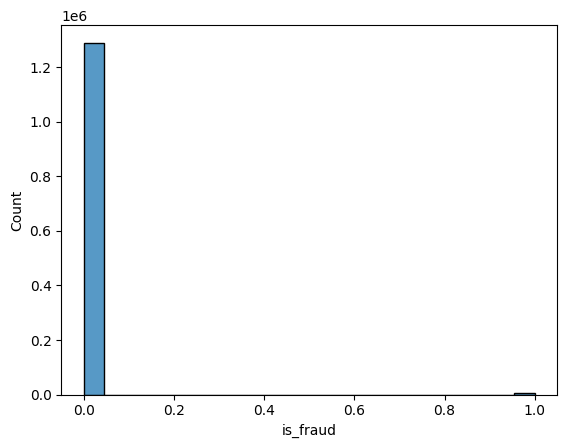

In [ ]:
sns.histplot(df_train['is_fraud'])
plt.xlabel('is_fraud')
plt.show()

In [ ]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
print(f"Percentage of non-fraudulent transactions: {(df_train['is_fraud'].value_counts()[0] / df_train.shape[0]) * 100}%")
print(f"Percentage of fraudulent transactions: {(df_train['is_fraud'].value_counts()[1] / df_train.shape[0]) * 100}%")

Percentage of non-fraudulent transactions: 99.42113482561166%
Percentage of fraudulent transactions: 0.5788651743883394%


# Eksplorasi Fitur trans_date_trans_time

In [ ]:
# Membuat ekstrak jam dari trans_date_trans_time dan jadikan fitur baru
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

In [ ]:
# Menampilkan jumlah transaksi tiap jam nya
df_train['hour'].value_counts()

hour
23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: count, dtype: int64

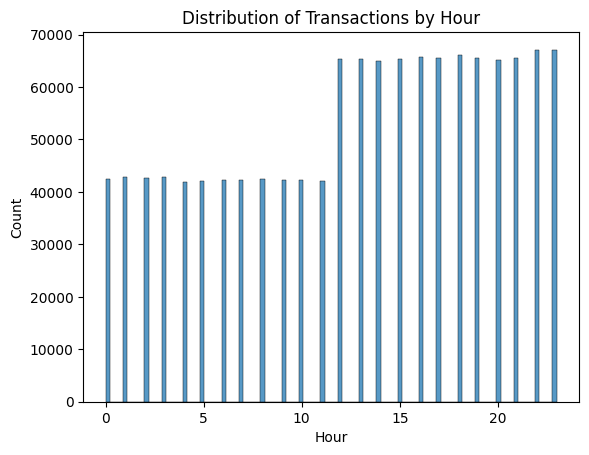

In [ ]:
# Visualisasi distribusi transaksi berdasarkan jamnya
sns.histplot(df_train['hour'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Hour')
plt.show()

Transaksi banyak terjadi pada jam **12.00 - 23.00**. Pada jam tersebut, transaksi konstan berkisar di **64000-68000**.

Pada jam **00.00 - 11.00**, transaksi konstan berkisar di **41000-43000**.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Ekstrak jam dari kolom trans_date_trans_time untuk transaksi fraud
fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour

# Hitung jumlah transaksi fraud untuk setiap jam
fraud_by_hour = fraud_transactions['hour'].value_counts().sort_index()

<ipython-input-7-e99863a336b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour


In [ ]:
fraud_by_hour

hour
0      635
1      658
2      625
3      609
4       46
5       60
6       40
7       56
8       49
9       47
10      40
11      42
12      67
13      80
14      86
15      79
16      76
17      78
18      81
19      81
20      62
21      74
22    1931
23    1904
Name: count, dtype: int64

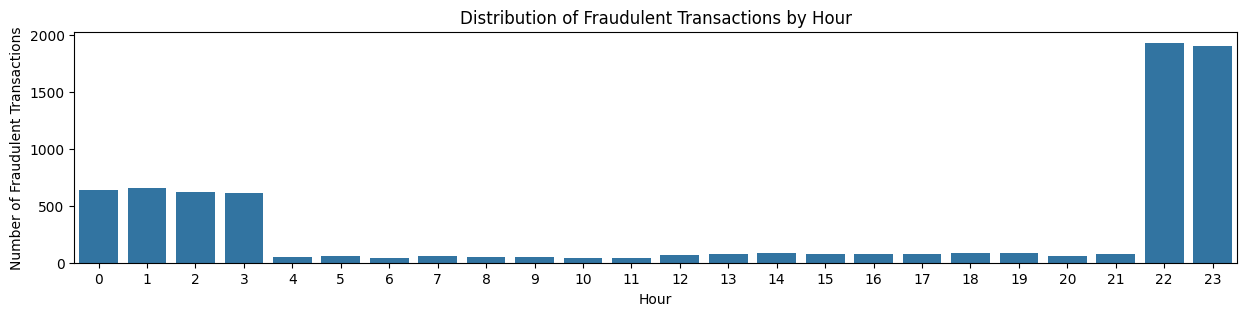

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan jamnya
plt.figure(figsize=(15, 3))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()

In [ ]:
# prompt: membuat kolom baru di mana jika kolom hour bernilai 0-3, maka termasuk ke dalam 'low risk'. Jika kolom hour bernilai 4-21, maka termasuk ke dalam 'medium risk'. Dan jika kolom hour bernilai 22-23, maka termasuk ke dalam 'high risk'

def categorize_risk_of_hour(hour):
  if hour >= 0 and hour <= 3:
    return 2
  elif hour >= 4 and hour <= 21:
    return 1
  elif hour >= 22 and hour <= 23:
    return 3

df_train['risk_category_of_hour'] = df_train['hour'].apply(categorize_risk_of_hour)
df_test['risk_category_of_hour'] = df_test['hour'].apply(categorize_risk_of_hour)

In [ ]:
df_train['risk_category_of_hour'].value_counts()

risk_category_of_hour
1    991793
2    170796
3    134086
Name: count, dtype: int64

Jam dengan potensi fraud terendah terjadi pada jam **04.00 - 21.00** dengan jumlah terjadinya fraud berkisar antara **40-86** transaksi.

Jam dengan potensi fraud sedang terjadi pada jam **00.00 - 03.00** dengan jumlah terjadinya fraud berkisar antara **609-658** transaksi.

Jam dengan potensi fraud tertinggi terjadi pada jam **22.00 dan 23.00** dengan jumlah terjadinya fraud berkisar antara **1904-1931**

Pisahkan menjadi **3** kategori

In [ ]:
# Ekstrak data harian dari kolom trans_date_trans_time dan jadikan kolom baru
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.day_of_week
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.day_of_week

In [ ]:
df_train['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int32)

In [ ]:
df_train['day_of_week'].value_counts()

day_of_week
0    254282
6    250579
5    200957
1    160227
4    152272
3    147285
2    131073
Name: count, dtype: int64

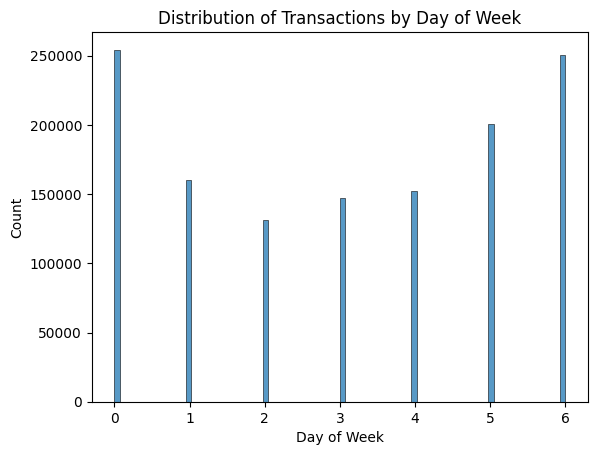

In [ ]:
# Visualisasi distribusi transaksi berdasarkan hari dalam seminggu
sns.histplot(df_train['day_of_week'])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Day of Week')
plt.show()

Transaksi banyak terjadi di hari **Senin dan Minggu** yang berkisar antara **250 ribuan** transaksi. Sedangkan hari **Rabu** menjadi hari yang paling sedikit terjadi transaksi, yaitu sekitar **130 ribuan**.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Ekstrak hari dalam seminggu dari kolom trans_date_trans_time untuk transaksi fraud
fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_of_week

# Hitung jumlah transaksi fraud untuk setiap hari dalam seminggu
fraud_by_day = fraud_transactions['day_of_week'].value_counts().sort_index()

<ipython-input-10-2b542ee4107e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_of_week


In [ ]:
fraud_by_day

day_of_week
0    1182
1     935
2     859
3    1008
4    1079
5    1227
6    1216
Name: count, dtype: int64

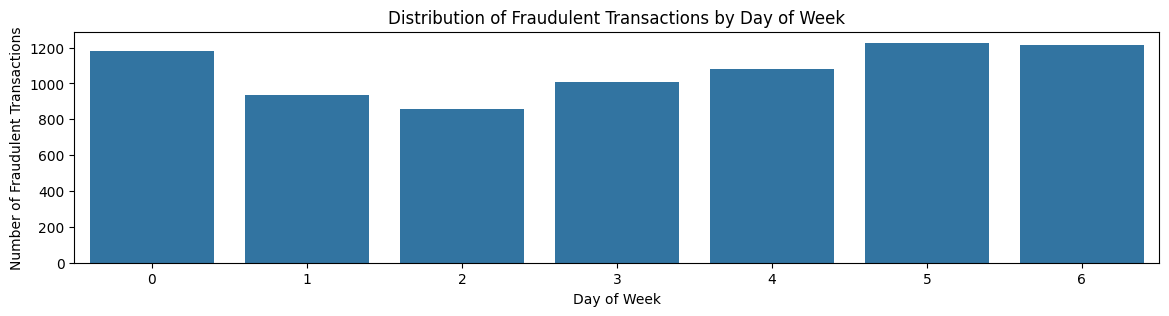

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan hari dalam seminggu
plt.figure(figsize=(14, 3))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Day of Week')
plt.show()

In [ ]:
def cateforize_risk_by_day_of_week(day_of_week):
  if day_of_week in [1, 2, 3, 4]:
    return 0
  else:
    return 1

df_train['risk_category_by_day_of_week'] = df_train['day_of_week'].apply(cateforize_risk_by_day_of_week)
df_test['risk_category_by_day_of_week'] = df_train['day_of_week'].apply(cateforize_risk_by_day_of_week)

In [ ]:
df_train['risk_category_by_day_of_week'].value_counts()

risk_category_by_day_of_week
1    705818
0    590857
Name: count, dtype: int64

Transaksi fraud berdasarkan harinya tidak terlalu berbeda jauh, namun transaksi paling sering terjadi pada hari **Senin, Sabtu, dan Minggu** dengan jumlah transaksi berkisar antara **1200-an** transaksi.

Sedangkan hari dengan transaksi fraud paling sedikit terjadi pada hari **Rabu** dengan transaksi berjumlah **859** transaksi.

Pisahkan menjadi **2** kategori

# Eksplorasi Fitur category

In [ ]:
df_train['category'].describe()

count           1296675
unique               14
top       gas_transport
freq             131659
Name: category, dtype: object

In [ ]:
df_train['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

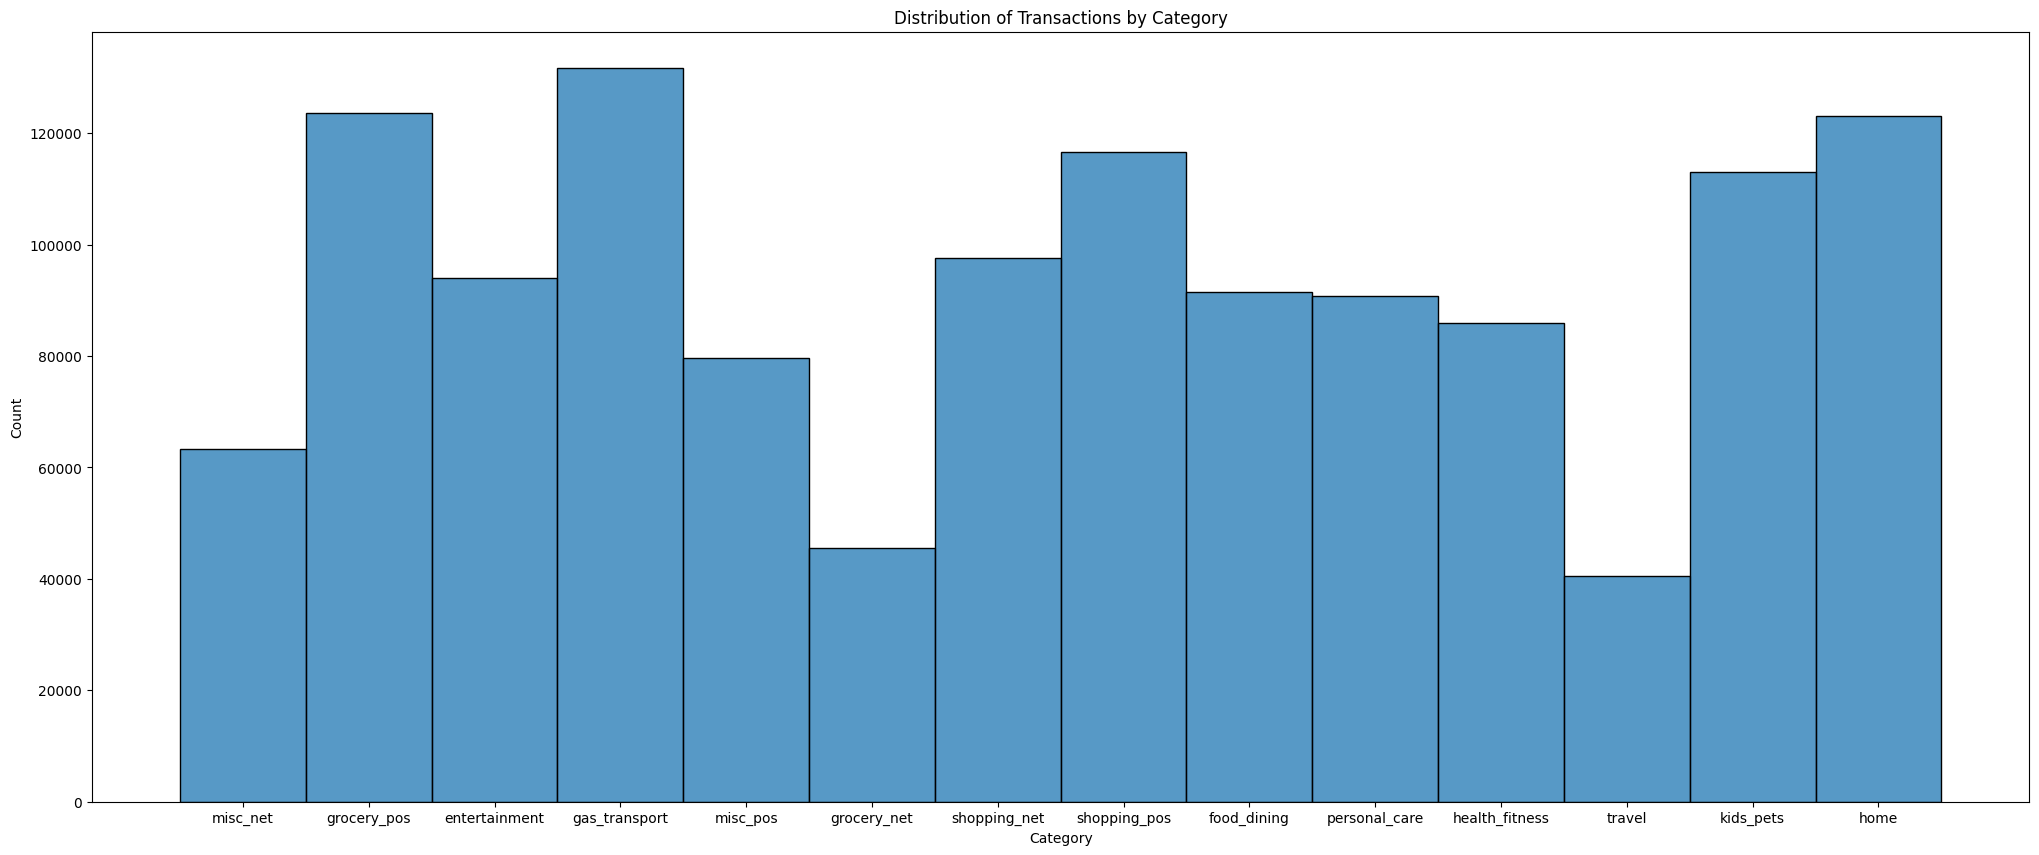

In [ ]:
# Visualisasi distribusi transaksi berdasarkan category
plt.figure(figsize=(25, 10))
sns.histplot(df_train['category'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Category')
plt.show()

Kategori dengan transaksi terbanyak ialah **gas_transport** dengan jumlah **131659** transaksi.

Sedangkan kategori dengan transaksi paling sedikit ialah **travel** dengan jumlah **40507** transaksi.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Hitung jumlah transaksi fraud untuk setiap kategori
fraud_by_category = fraud_transactions['category'].value_counts().sort_index()

In [ ]:
fraud_by_category

category
entertainment      233
food_dining        151
gas_transport      618
grocery_net        134
grocery_pos       1743
health_fitness     133
home               198
kids_pets          239
misc_net           915
misc_pos           250
personal_care      220
shopping_net      1713
shopping_pos       843
travel             116
Name: count, dtype: int64

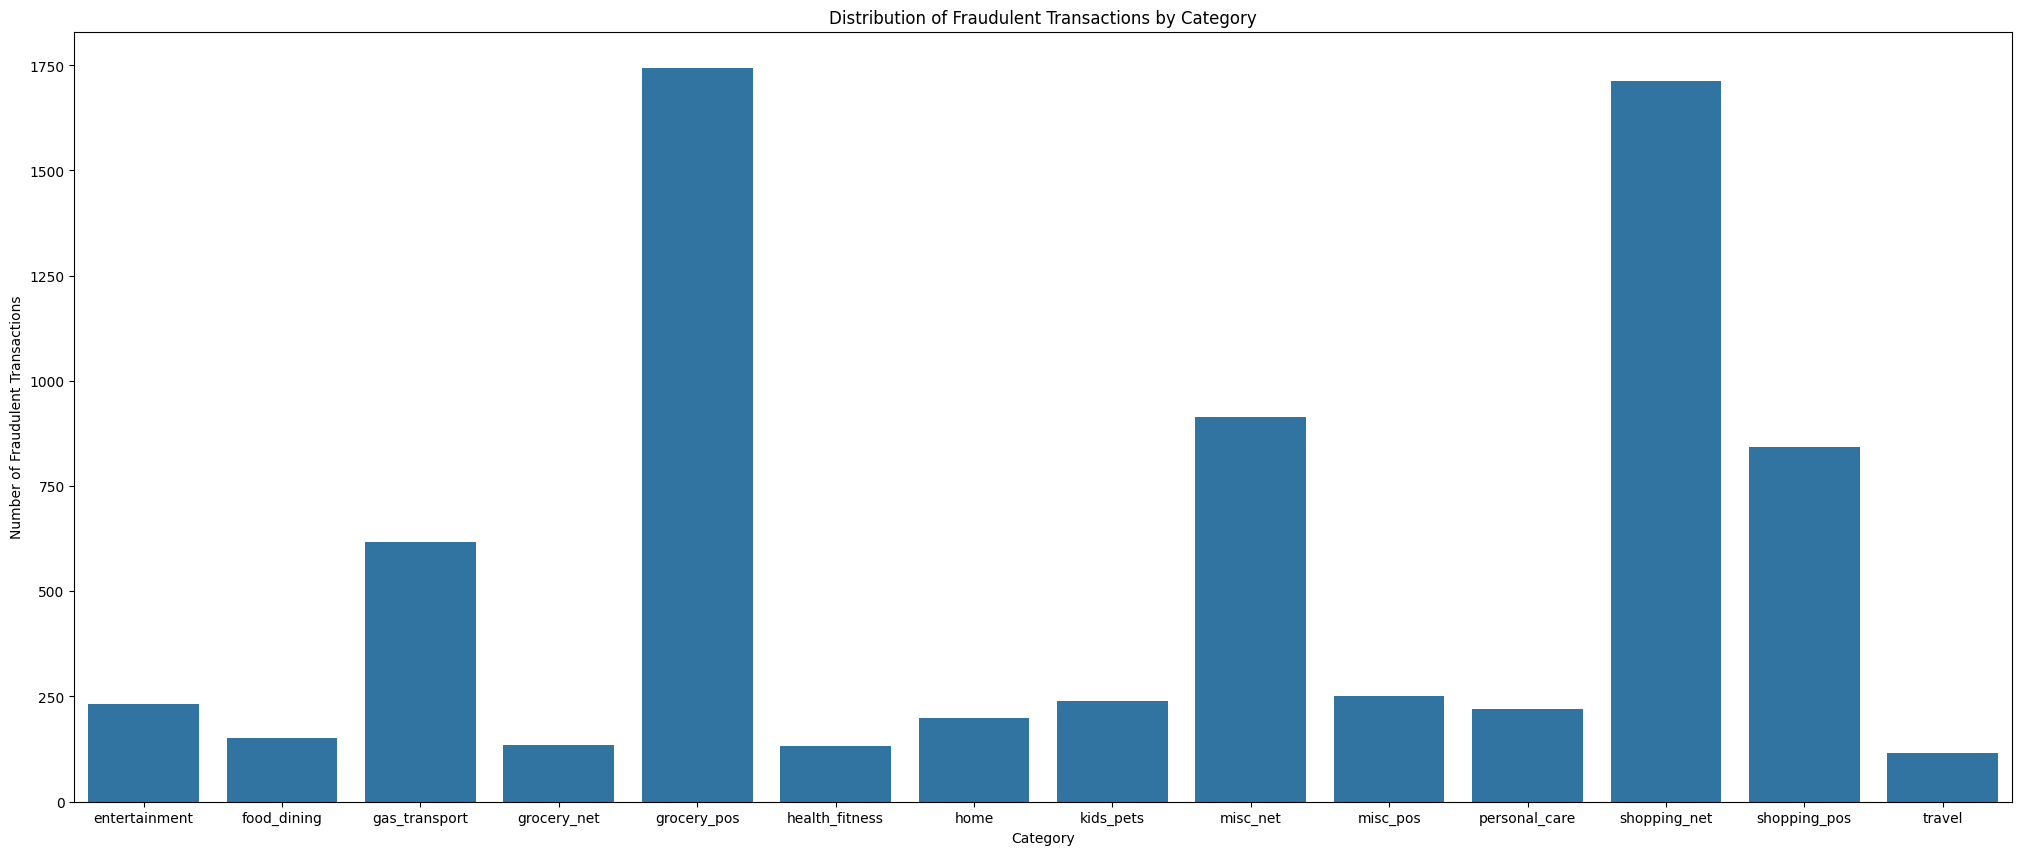

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan kategori
plt.figure(figsize=(25, 10))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Category')
plt.show()

In [ ]:
def categorize_risk_by_category(category):
  if category in ['gas_transport', 'misc_net', 'shopping_pos']:
    return 2
  elif category in ['grocery_pos', 'shopping_net']:
    return 3
  else:
    return 1

df_train['risk_category_by_category'] = df_train['category'].apply(categorize_risk_by_category)
df_test['risk_category_by_category'] = df_test['category'].apply(categorize_risk_by_category)

In [ ]:
df_train['risk_category_by_category'].value_counts()

risk_category_by_category
1    763876
2    311618
3    221181
Name: count, dtype: int64

Dari visualisasi di atas, distribusi transaksi fraud berdasarkan category dapat dibagi menjadi 3.

Category dengan transaksi fraud tertinggi ialah **grocery_pos** dan **shopping_net** dengan 1700-an transaksi.

Category dengan transaksi fraud sedang ialah **gas_transport, misc_net, dan shopping_pos** dengan berkisar antara **618-915** transaksi.

Sisanya ialah category dengan transaksi fraud terendah dengan berkisar antara **116-250** transaksi.

# Eksplorasi Fitur amt

In [ ]:
df_train['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
# Melihat apakah terdapat nilai 0 pada kolom amt
df_train['amt'][df_train['amt']==0].any()

False

In [ ]:
print(f'Transaksi Terkecil: $ {df_train["amt"].min()}')
print(f'Transaksi Terbesar: $ {df_train["amt"].max()}')
print(f'Rata-rata Transaksi: $ {df_train["amt"].mean()}')
print(f'Median Transaksi: $ {df_train["amt"].median()}')
print(f'Modus Transaksi: $ {df_train["amt"].mode()[0]}')

Transaksi Terkecil: $ 1.0
Transaksi Terbesar: $ 28948.9
Rata-rata Transaksi: $ 70.35103545607033
Median Transaksi: $ 47.52
Modus Transaksi: $ 1.14


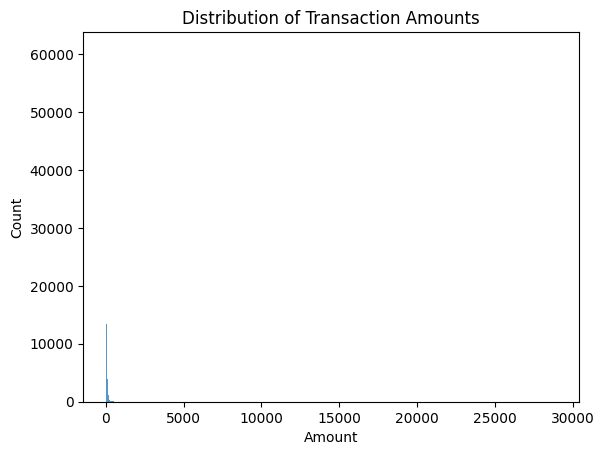

In [ ]:
# Visualisasi distribusi dari kolom amt
sns.histplot(df_train['amt'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

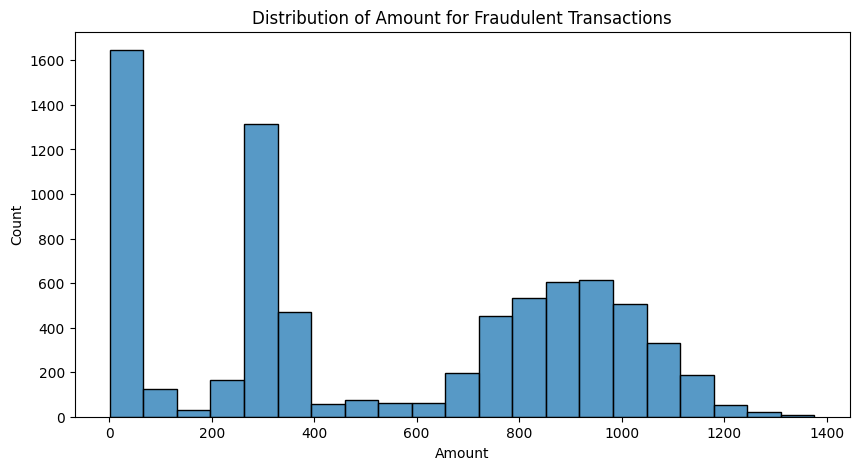

In [ ]:
# Menampilkan fraud berdasarkan amount

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(df_fraud['amt'])
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Eksplorasi Kolom gender

In [ ]:
df_train['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

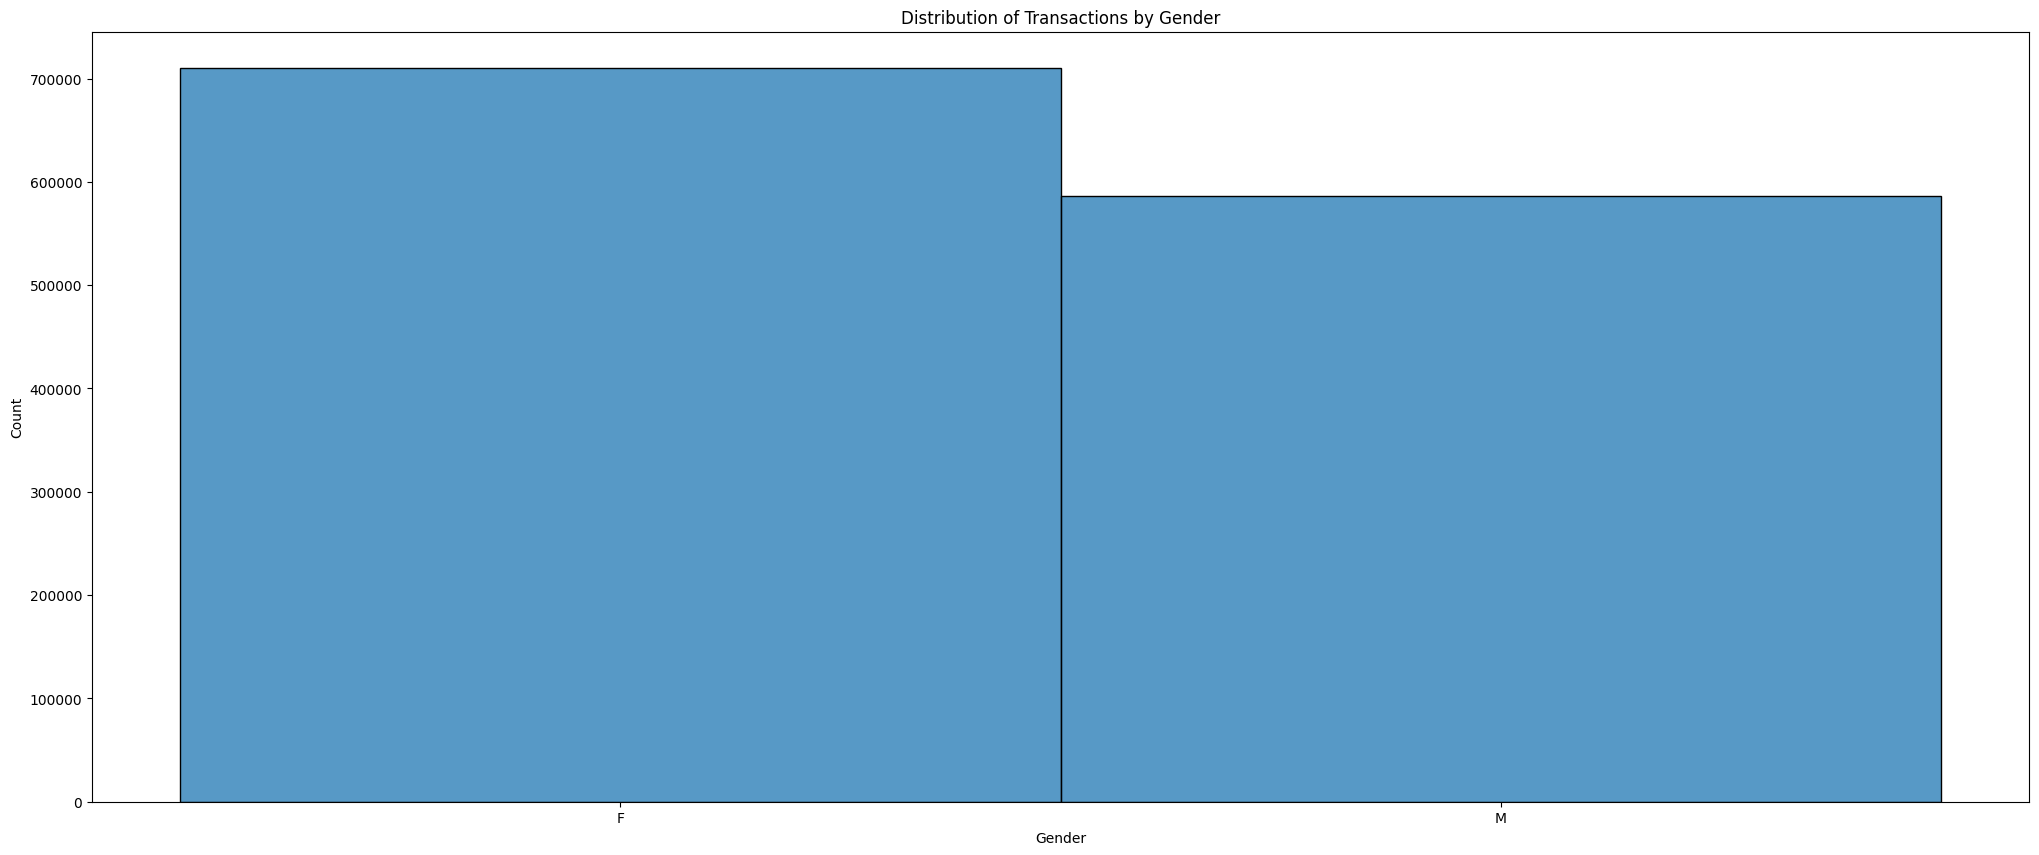

In [ ]:
# Visualisasi distribusi transaksi berdasarkan gender
plt.figure(figsize=(25, 10))
sns.histplot(df_train['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Gender')
plt.show()

Transaksi lebih banyak dilakukan oleh **perempuan** daripada **laki-laki**

In [ ]:
# Hitung jumlah transaksi fraud untuk setiap gender
fraud_by_gender = fraud_transactions['gender'].value_counts().sort_index()

In [ ]:
fraud_by_gender

gender
F    3735
M    3771
Name: count, dtype: int64

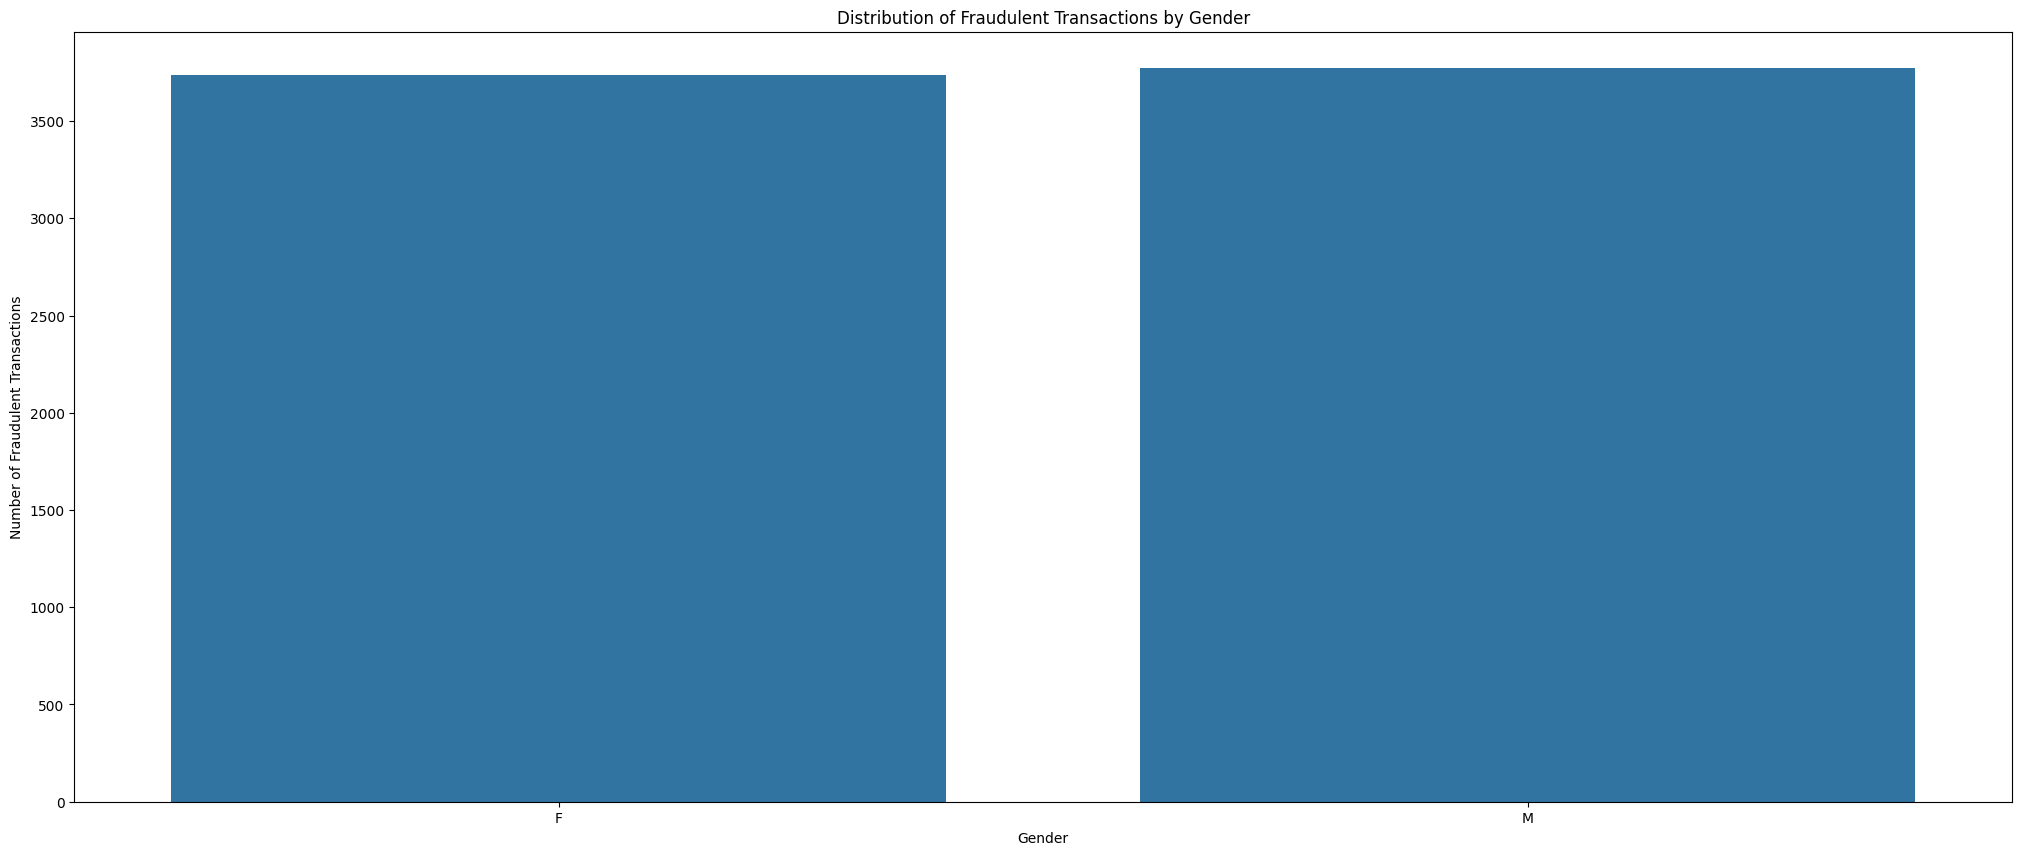

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan kategori
plt.figure(figsize=(25, 10))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.show()

Perbandingan transaksi fraud berdasarkan gender **tidak berbeda jauh**, sehingga tidak ada informasi yang didapat dari kolom gender dan nantinya dapat di drop

# Eksplorasi Kolom city dan city_pop

In [ ]:
df_train['city'].nunique()

894

In [ ]:
df_train['city_pop'].value_counts()

city_pop
606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: count, Length: 879, dtype: int64

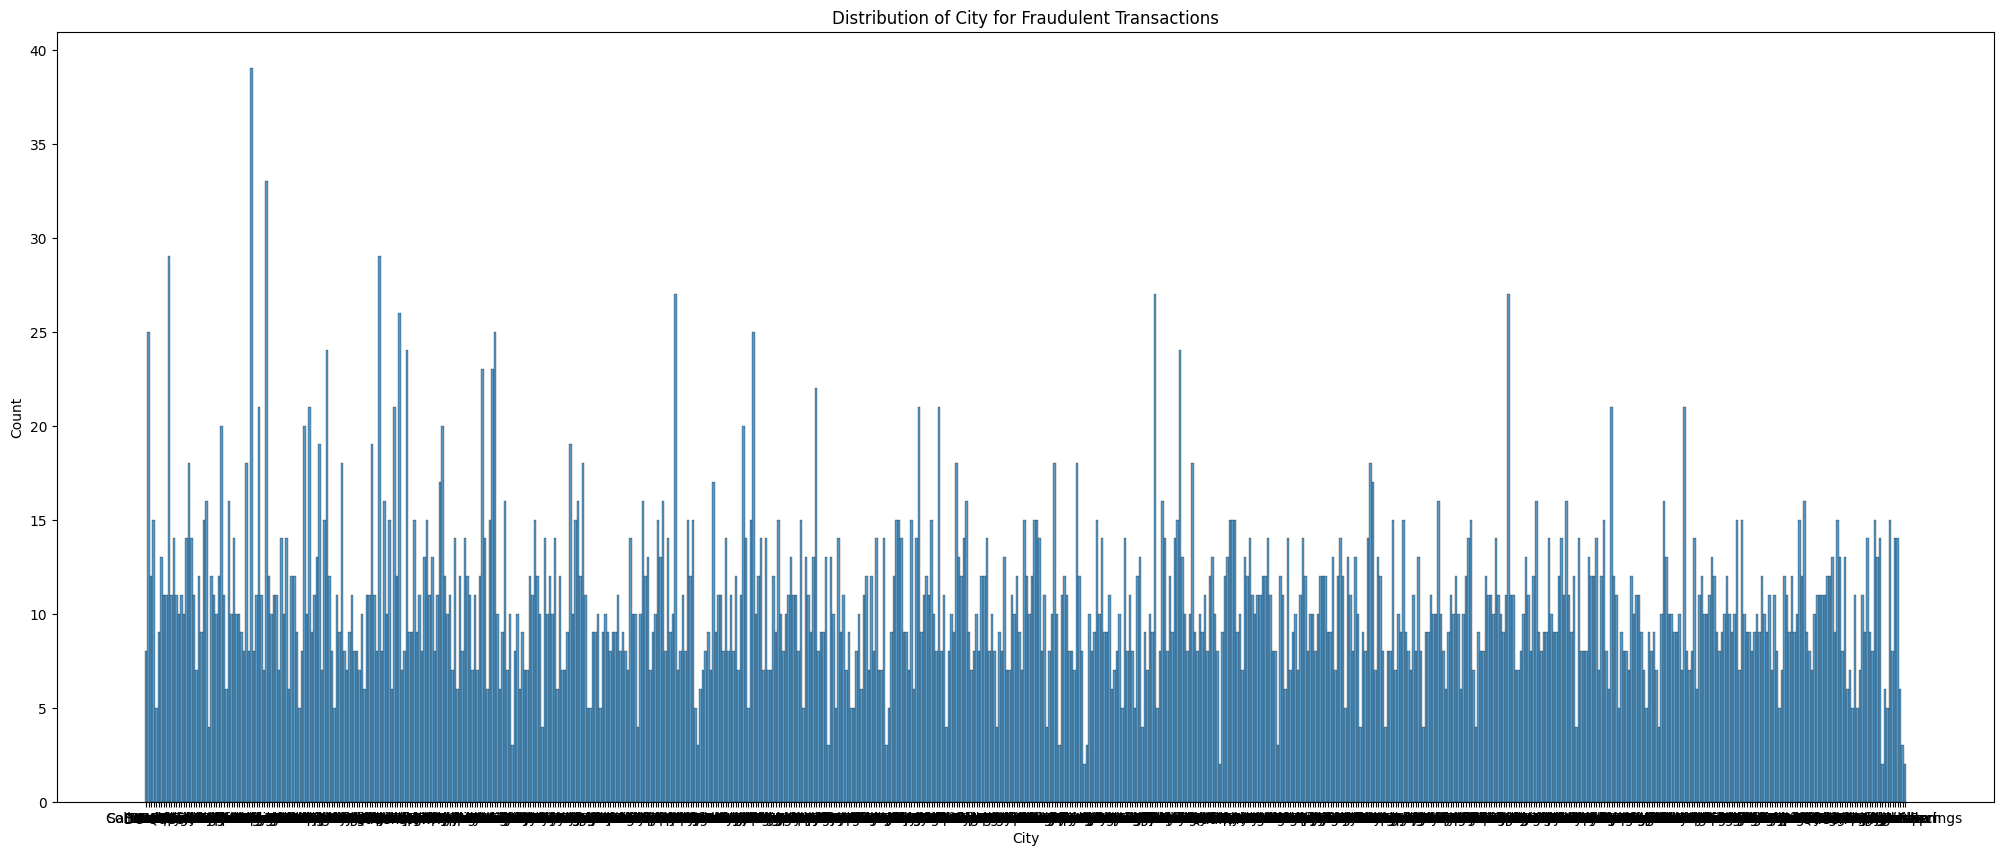

In [ ]:
# Menampilkan fraud berdasarkan city

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['city'])
plt.title('Distribution of City for Fraudulent Transactions')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

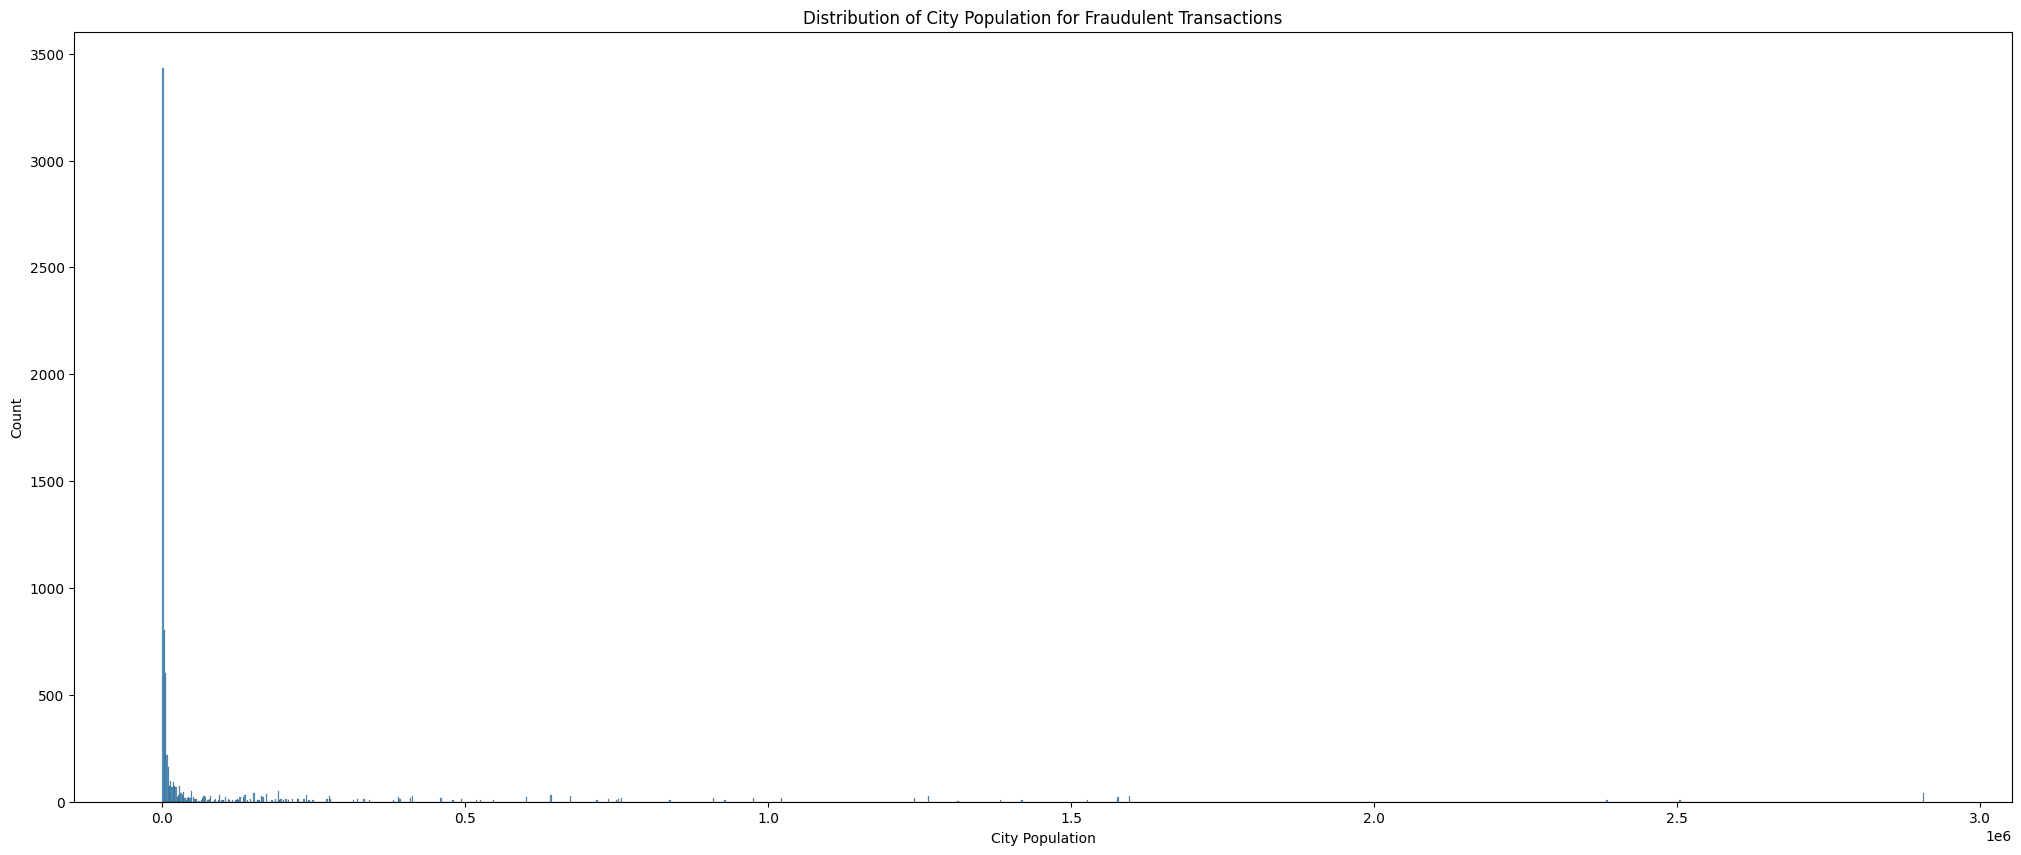

In [ ]:
# Menampilkan fraud berdasarkan city population

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['city_pop'])
plt.title('Distribution of City Population for Fraudulent Transactions')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()

Karena kotanya terlalu banyak, maka kami memutuskan untuk melakukan drop pada kolom city, yang berarti juga city_pop juga harus di drop nantinya

# Eksplorasi kolom lat, long, merch_lat, dan merch_long

lat dan long menginformasikan posisi dari credit card holder. merch_lat dan merch_long menginformasikan posisi dari merchant. Sehingga dari kedua informasi tersebut, kita dapat mencari jarak dari credit card holder dan merchant dan menjadikannya fitur baru.

In [ ]:
# Membuat perhitungan untuk menghitung jarak antara credit card holder dan merchant berdasarkan lat long dan merch_lat merch_long

def haversine_distance(origin, destination):
  """
  Calculate the great-circle distance between two points on Earth.

  Args:
    origin: A tuple of (latitude, longitude) for the origin point.
    destination: A tuple of (latitude, longitude) for the destination point.

  Returns:
    The distance between the two points in kilometers.
  """
  lat1, lon1 = origin
  lat2, lon2 = destination
  radius = 6371  # Earth's radius in kilometers

  dlat = np.radians(lat2 - lat1)
  dlon = np.radians(lon2 - lon1)

  a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  distance = radius * c

  return distance

# Calculate the distance between the credit card holder and the merchant for each transaction
df_train['distance'] = haversine_distance((df_train['lat'], df_train['long']), (df_train['merch_lat'], df_train['merch_long']))
df_test['distance'] = haversine_distance((df_test['lat'], df_test['long']), (df_test['merch_lat'], df_test['merch_long']))

In [ ]:
df_train['distance'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance, dtype: float64

In [ ]:
df_train['distance'][df_train['distance']==0].any()

False

In [ ]:
print(f'Jarak Terdekat: {df_train["distance"].min()} km')
print(f'Jarak Terjauh: {df_train["distance"].max()} km')
print(f'Rata-rata Jarak: {df_train["distance"].mean()} km')
print(f'Median Jarak: {df_train["distance"].median()} km')
print(f'Modus Jarak: {df_train["distance"].mode()[0]} km')

Jarak Terdekat: 0.022254515638296814 km
Jarak Terjauh: 152.11717310594904 km
Rata-rata Jarak: 76.11465060395156 km
Median Jarak: 78.2317512923314 km
Modus Jarak: 0.022254515638296814 km


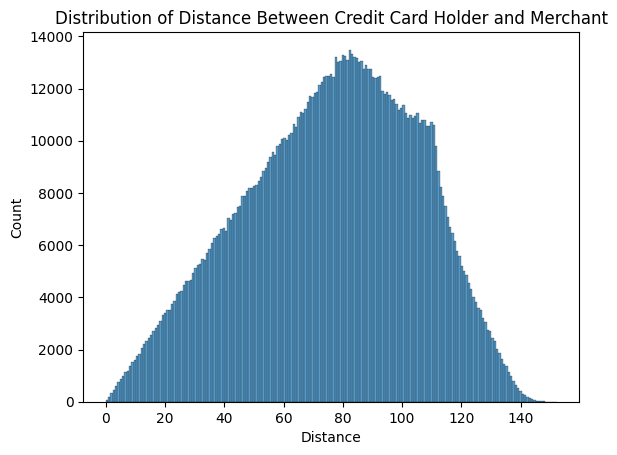

In [ ]:
# Visualisasi distribusi dari kolom distance
sns.histplot(df_train['distance'])
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distribution of Distance Between Credit Card Holder and Merchant')
plt.show()

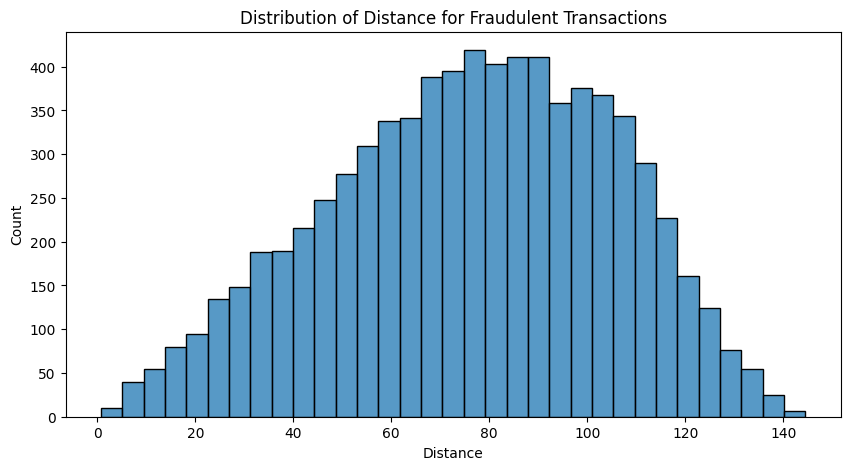

In [ ]:
# Menampilkan fraud berdasarkan distance

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(df_fraud['distance'])
plt.title('Distribution of Distance for Fraudulent Transactions')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

# Eksplorasi Fitur job

In [ ]:
df_train['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [ ]:
df_train['job'].nunique()

494

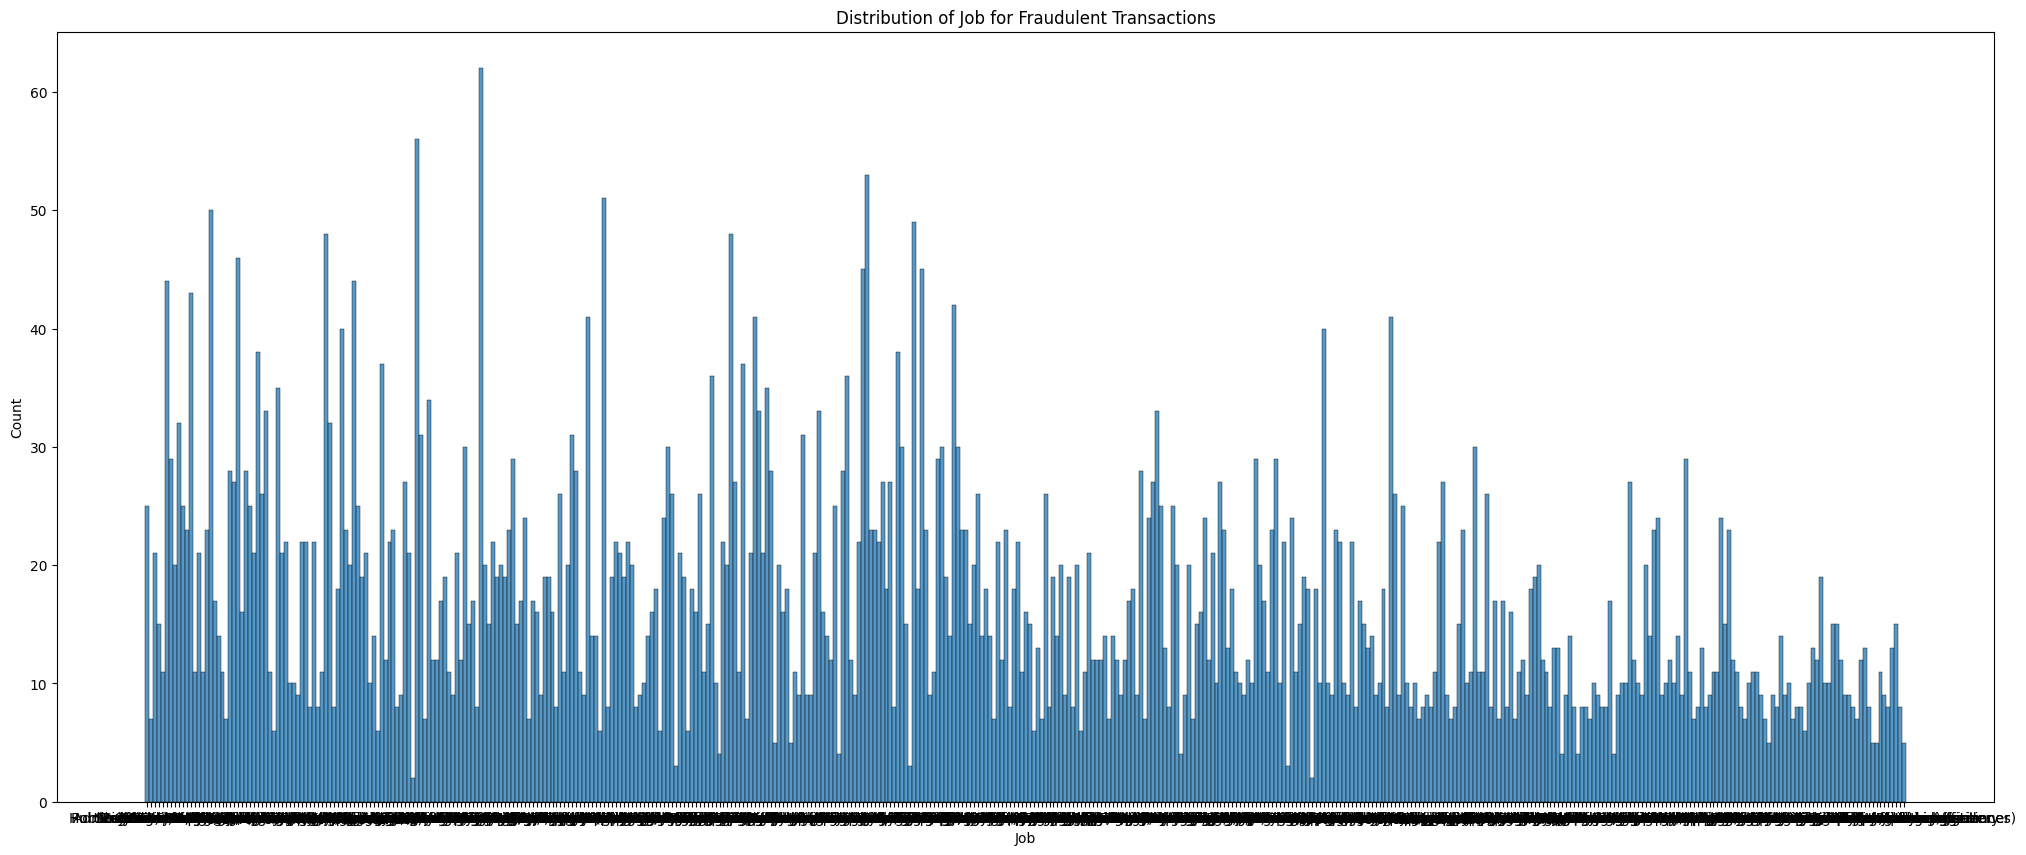

In [ ]:
# Menampilkan fraud berdasarkan job

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['job'])
plt.title('Distribution of Job for Fraudulent Transactions')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

Melihat distribusinya, saya memutuskan untuk melakukan drop saja terhadap fitur job.

# Eksplorasi Fitur dob

Karena distribusi dob terlalu banyak, maka saya akan menggantinya dengan kolom baru bernama age yang diambil dari perhitungan dob dengan trans_date_trans_time.

In [ ]:
# Membuat perhitungan umur berdasarkan kolom dob dan kolom trans_date_trans_time

df_train['age'] = df_train['trans_date_trans_time'].dt.year - df_train['dob'].dt.year
df_test['age'] = df_test['trans_date_trans_time'].dt.year - df_test['dob'].dt.year

In [ ]:
df_train['age'].describe()

count    1.296675e+06
mean     4.602930e+01
std      1.738237e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [ ]:
df_train['age'][df_train['age']==0].any()

False

In [ ]:
print(f'Umur Termuda: {df_train["age"].min()}')
print(f'Umur Tertua: {df_train["age"].max()}')
print(f'Rata-rata Umur: {df_train["age"].mean()}')
print(f'Median Umur: {df_train["age"].median()}')
print(f'Modus Umur: {df_train["age"].mode()[0]}')

Umur Termuda: 14
Umur Tertua: 96
Rata-rata Umur: 46.02929801222357
Median Umur: 44.0
Modus Umur: 47


In [ ]:
df_train['age'].nunique()

83

In [ ]:
df_fraud = df_train[df_train['is_fraud'] == 1]

In [ ]:
df_fraud['age'].nunique()

80

In [ ]:
df_fraud['age'].value_counts()

age
49    201
33    197
58    195
43    185
22    175
     ... 
93     16
15     16
75     12
68     11
14      7
Name: count, Length: 80, dtype: int64

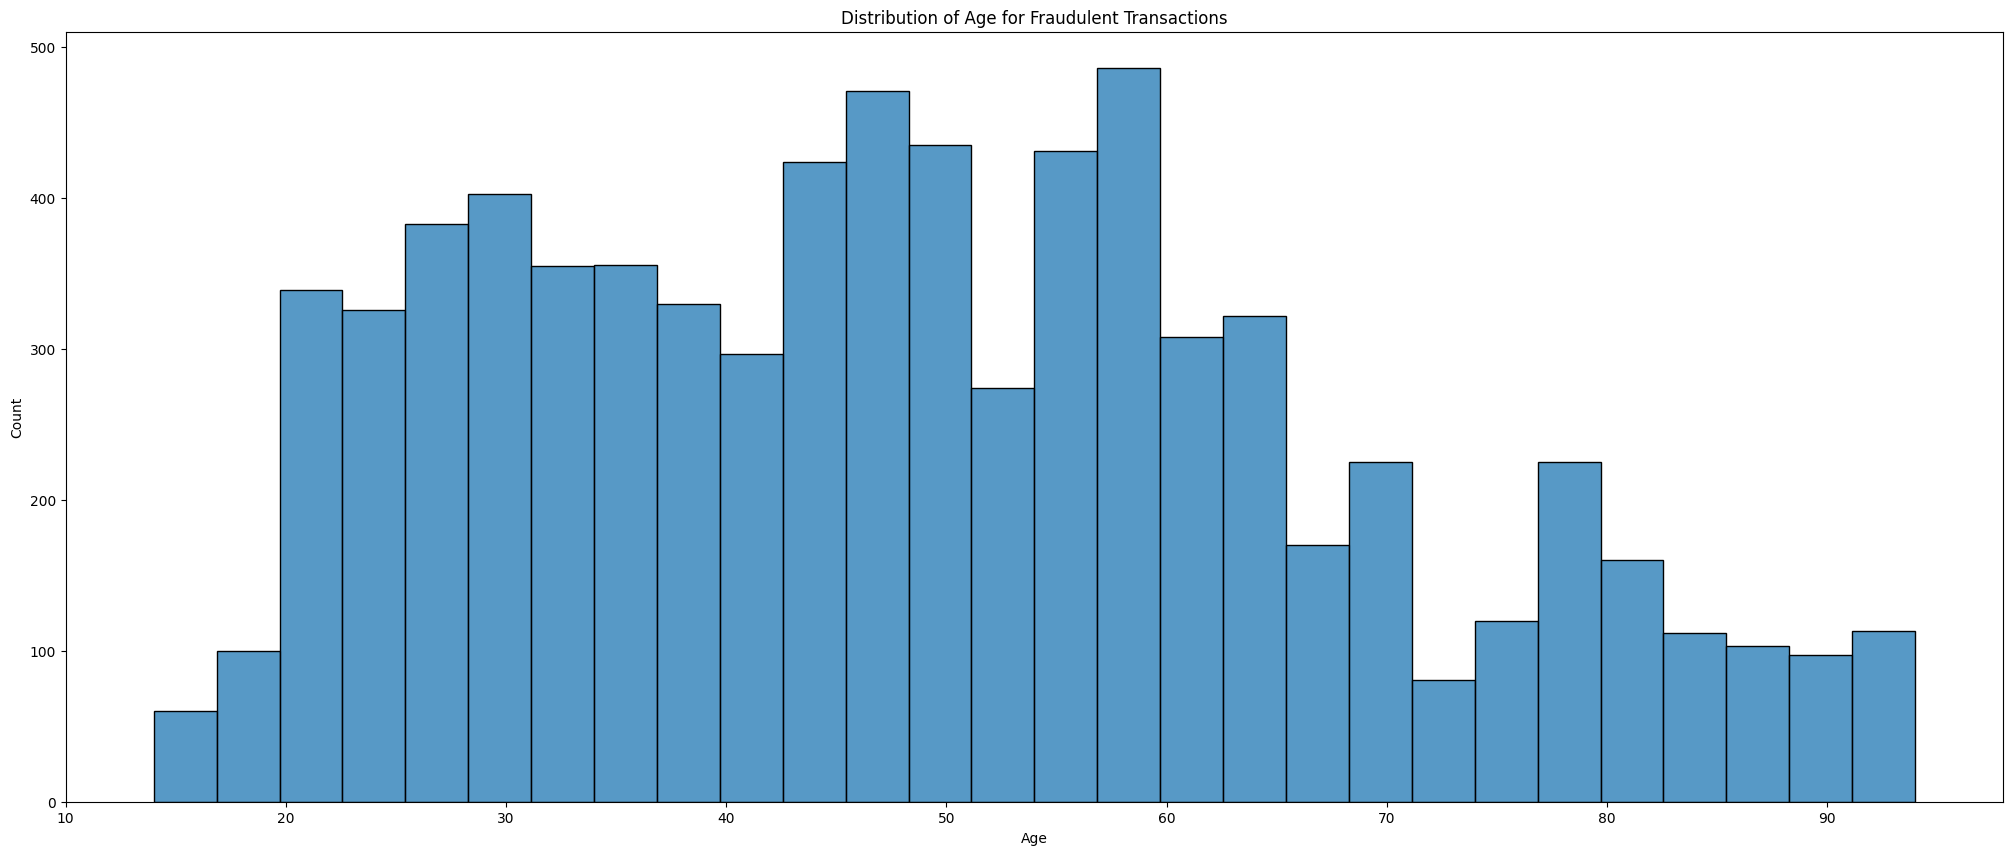

In [ ]:
# Menampilkan fraud berdasarkan age

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['age'])
plt.title('Distribution of Age for Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
def categorize_risk_by_age(age):
  if age >= 19 and age <= 65:
    return 1
  else:
    return 0

df_train['risk_category_by_age'] = df_train['age'].apply(categorize_risk_by_age)
df_test['risk_category_by_age'] = df_test['age'].apply(categorize_risk_by_age)

# Melakukan Drop Fitur

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   trans_date_trans_time         1296675 non-null  datetime64[ns]
 1   cc_num                        1296675 non-null  int64         
 2   category                      1296675 non-null  object        
 3   amt                           1296675 non-null  float64       
 4   gender                        1296675 non-null  object        
 5   city                          1296675 non-null  object        
 6   lat                           1296675 non-null  float64       
 7   long                          1296675 non-null  float64       
 8   city_pop                      1296675 non-null  int64         
 9   job                           1296675 non-null  object        
 10  dob                           1296675 non-null  datetime64[ns]
 11

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trans_date_trans_time         555719 non-null  datetime64[ns]
 1   cc_num                        555719 non-null  int64         
 2   category                      555719 non-null  object        
 3   amt                           555719 non-null  float64       
 4   gender                        555719 non-null  object        
 5   city                          555719 non-null  object        
 6   lat                           555719 non-null  float64       
 7   long                          555719 non-null  float64       
 8   city_pop                      555719 non-null  int64         
 9   job                           555719 non-null  object        
 10  dob                           555719 non-null  datetime64[ns]
 11  merch_lat    

In [ ]:
df_train.drop(columns=['trans_date_trans_time', 'cc_num', 'category', 'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'hour', 'day_of_week', 'age'], axis=1, inplace=True)
df_test.drop(columns=['trans_date_trans_time', 'cc_num', 'category', 'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'hour', 'day_of_week', 'age'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   amt                           1296675 non-null  float64
 1   is_fraud                      1296675 non-null  int64  
 2   risk_category_of_hour         1296675 non-null  int64  
 3   risk_category_by_day_of_week  1296675 non-null  int64  
 4   risk_category_by_category     1296675 non-null  int64  
 5   distance                      1296675 non-null  float64
 6   risk_category_by_age          1296675 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 69.3 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   amt                           555719 non-null  float64
 1   is_fraud                      555719 non-null  int64  
 2   risk_category_of_hour         555719 non-null  int64  
 3   risk_category_by_day_of_week  555719 non-null  int64  
 4   risk_category_by_category     555719 non-null  int64  
 5   distance                      555719 non-null  float64
 6   risk_category_by_age          555719 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 29.7 MB


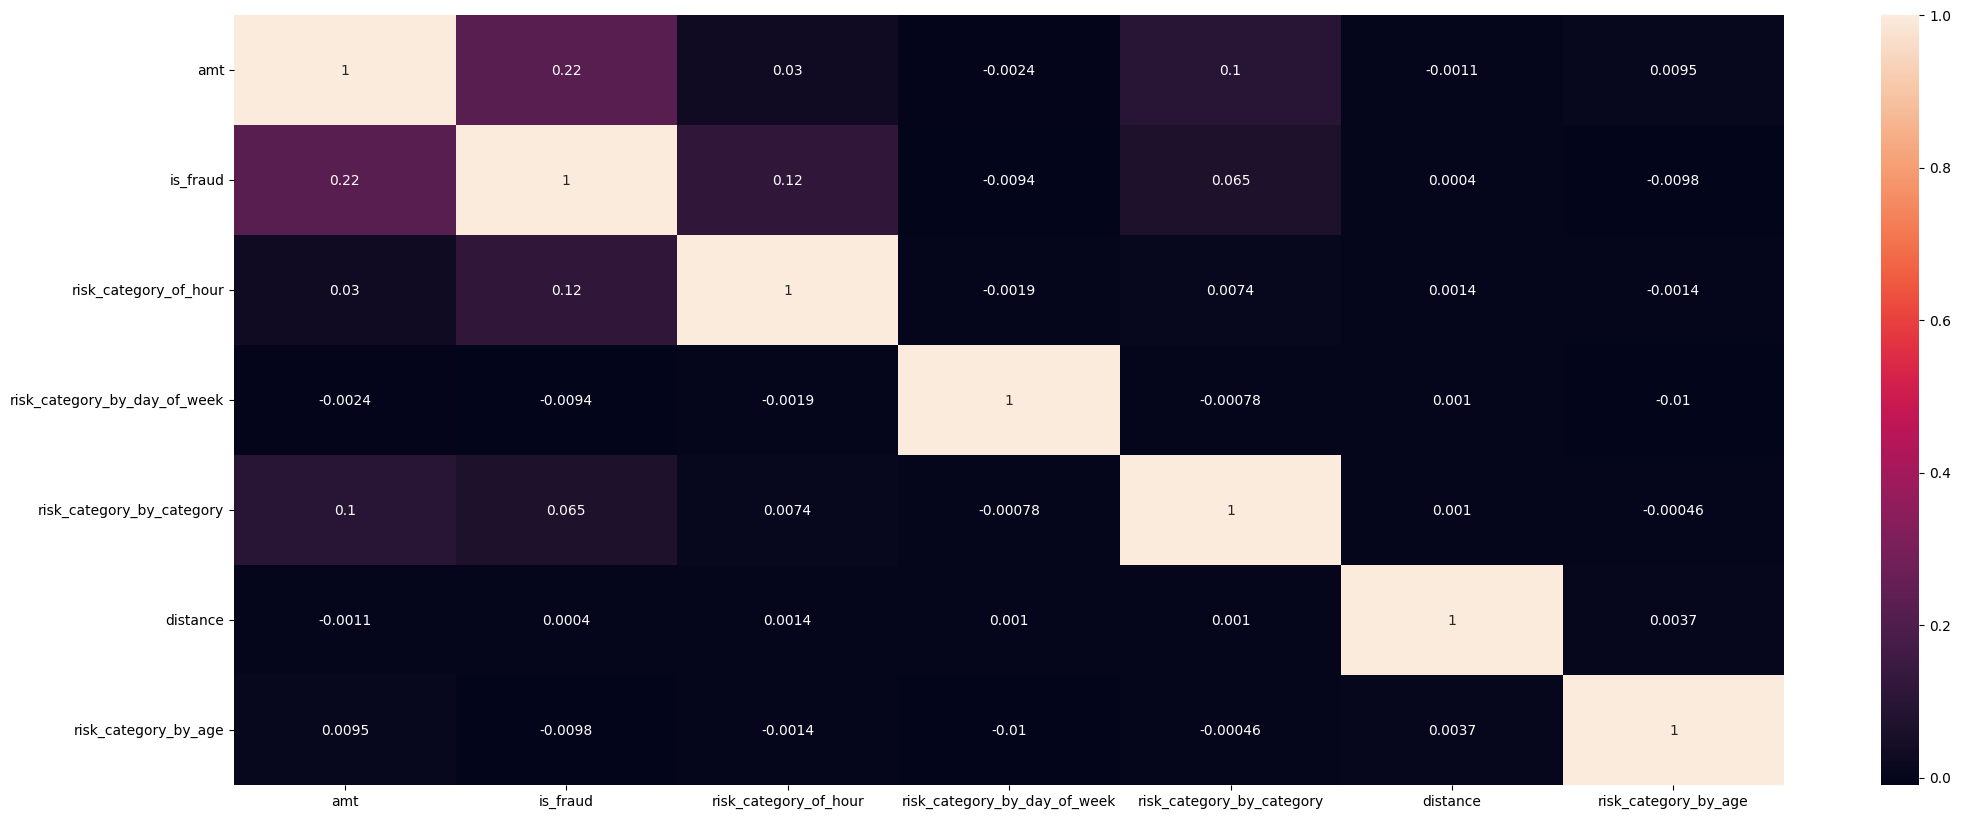

In [ ]:
corr = df_train.corr()
plt.subplots(figsize=(25, 10))
sns.heatmap(corr, annot=True)
plt.show()

# Modelling

In [ ]:
x_train = df_train.drop(columns=['is_fraud'], axis=1)
y_train = df_train['is_fraud']
x_test = df_test.drop(columns=['is_fraud'], axis=1)
y_test = df_test['is_fraud']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [183]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [182]:
logreg = LogisticRegression(class_weight='balanced', random_state=42, )
logreg.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
pred_train = logreg.predict(x_train_scaled)
pred_test = logreg.predict(x_test_scaled)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92   1289169
           1       0.03      0.84      0.06      7506

    accuracy                           0.85   1296675
   macro avg       0.52      0.85      0.49   1296675
weighted avg       0.99      0.85      0.92   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    553574
           1       0.02      0.84      0.04      2145

    accuracy                           0.86    555719
   macro avg       0.51      0.85      0.48    555719
weighted avg       1.00      0.86      0.92    555719



Accuracy Train: 0.8548580021979293
Precision Train: 0.03270854021847071
Recall Train: 0.8425259792166268
F1 Score Train: 0.06297236743838687

Accuracy Test: 0.8551624112186195
Precision Test: 0.021977887877382668
Recall Test: 0.8396270396270397
F1 Score Test: 0.04283454828697483



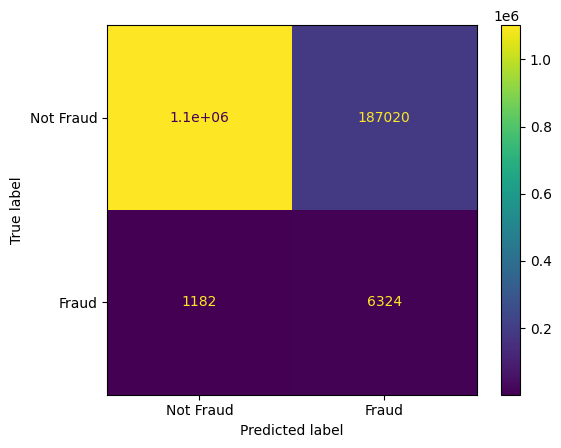

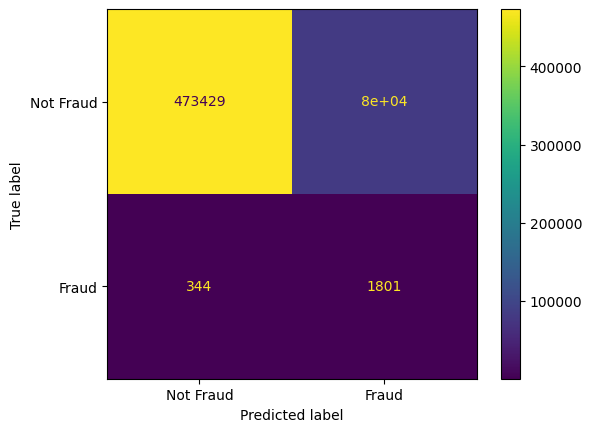

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, pred_train))
print("Precision Train:", precision_score(y_train, pred_train))
print("Recall Train:", recall_score(y_train, pred_train))
print("F1 Score Train:", f1_score(y_train, pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, pred_test))
print("Precision Test:", precision_score(y_test, pred_test))
print("Recall Test:", recall_score(y_test, pred_test))
print("F1 Score Test:", f1_score(y_test, pred_test))

print()

cm_train = confusion_matrix(y_train, pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [184]:
ada_logreg = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, learning_rate=0.1)
ada_logreg.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                     random_state=42),
                   learning_rate=0.1, n_estimators=100)

In [185]:
ada_logreg_pred_train = ada_logreg.predict(x_train_scaled)
ada_logreg_pred_test = ada_logreg.predict(x_test_scaled)

In [186]:
print("Classification Report Train:")
print(classification_report(y_train, ada_logreg_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_logreg_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89   1289169
           1       0.02      0.84      0.05      7506

    accuracy                           0.80   1296675
   macro avg       0.51      0.82      0.47   1296675
weighted avg       0.99      0.80      0.88   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    553574
           1       0.02      0.83      0.03      2145

    accuracy                           0.80    555719
   macro avg       0.51      0.82      0.46    555719
weighted avg       1.00      0.80      0.88    555719



Accuracy Train: 0.7978791910077698
Precision Train: 0.023593962281099005
Recall Train: 0.8398614441779909
F1 Score Train: 0.04589851215720822

Accuracy Test: 0.7974012045656168
Precision Test: 0.015698587127158554
Recall Test: 0.8344988344988346
F1 Score Test: 0.030817436815646304



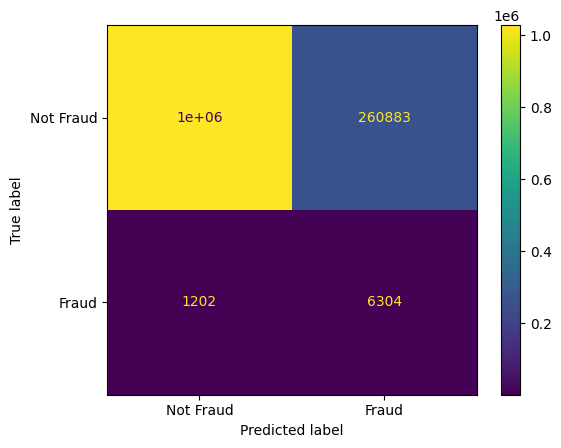

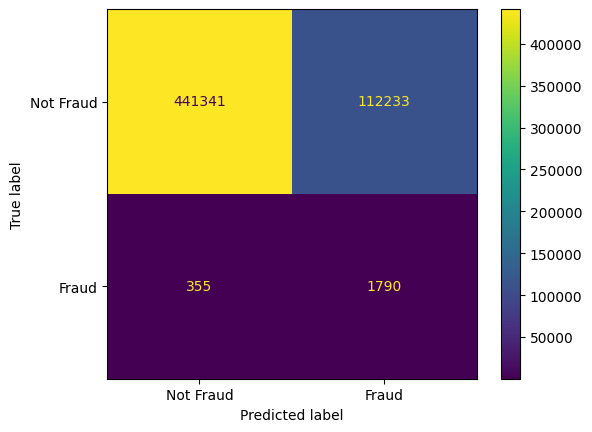

In [187]:
print("Accuracy Train:", accuracy_score(y_train, ada_logreg_pred_train))
print("Precision Train:", precision_score(y_train, ada_logreg_pred_train))
print("Recall Train:", recall_score(y_train, ada_logreg_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_logreg_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_logreg_pred_test))
print("Precision Test:", precision_score(y_test, ada_logreg_pred_test))
print("Recall Test:", recall_score(y_test, ada_logreg_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_logreg_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_logreg_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_logreg_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [188]:
ada = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [189]:
ada_pred_train = ada.predict(x_train)
ada_pred_test = ada.predict(x_test)

In [190]:
print("Classification Report Train:")
print(classification_report(y_train, ada_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.78      0.30      0.43      7506

    accuracy                           1.00   1296675
   macro avg       0.89      0.65      0.72   1296675
weighted avg       0.99      1.00      0.99   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.71      0.29      0.41      2145

    accuracy                           1.00    555719
   macro avg       0.85      0.64      0.70    555719
weighted avg       1.00      1.00      1.00    555719



Accuracy Train: 0.9954630111631674
Precision Train: 0.7803108808290156
Recall Train: 0.3009592326139089
F1 Score Train: 0.43438130948947223

Accuracy Test: 0.9968041402219467
Precision Test: 0.711340206185567
Recall Test: 0.2895104895104895
F1 Score Test: 0.411530815109344



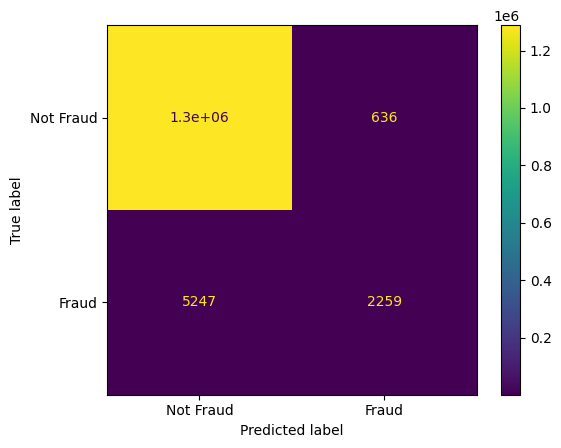

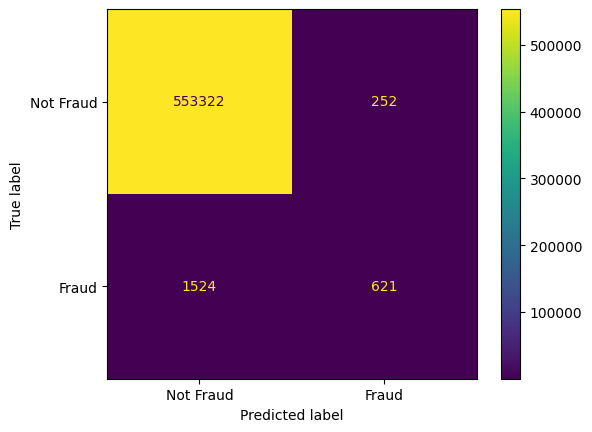

In [191]:
print("Accuracy Train:", accuracy_score(y_train, ada_pred_train))
print("Precision Train:", precision_score(y_train, ada_pred_train))
print("Recall Train:", recall_score(y_train, ada_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_pred_test))
print("Precision Test:", precision_score(y_test, ada_pred_test))
print("Recall Test:", recall_score(y_test, ada_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the training data
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, rf_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, rf_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.70      0.53      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.85      0.77      0.80    555719
weighted avg       1.00      1.00      1.00    555719



Accuracy Train: 0.9999946015771107
Precision Train: 1.0
Recall Train: 0.9990674127364775
F1 Score Train: 0.9995334888370543

Accuracy Test: 0.9973241872241186
Precision Test: 0.7023370233702337
Recall Test: 0.5324009324009324
F1 Score Test: 0.6056748872977991



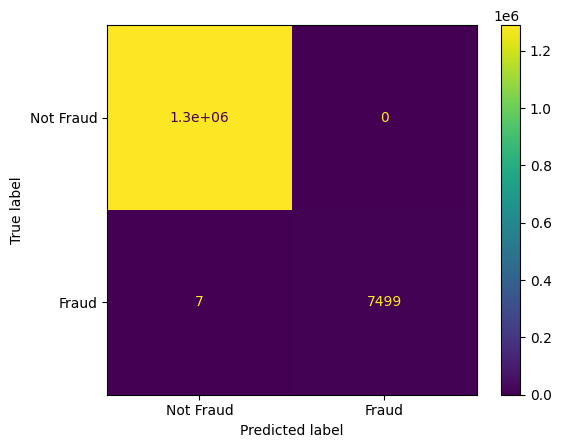

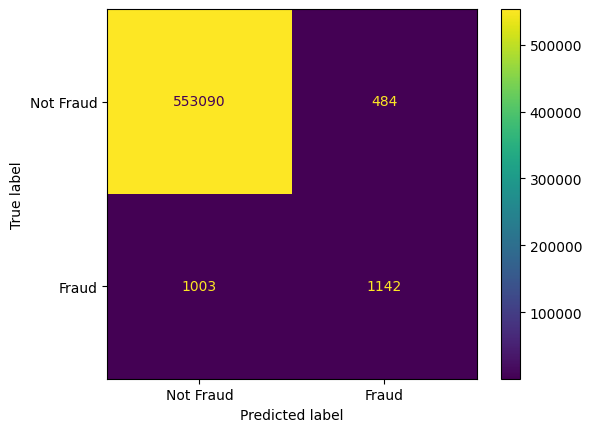

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, rf_pred_train))
print("Precision Train:", precision_score(y_train, rf_pred_train))
print("Recall Train:", recall_score(y_train, rf_pred_train))
print("F1 Score Train:", f1_score(y_train, rf_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, rf_pred_test))
print("Precision Test:", precision_score(y_test, rf_pred_test))
print("Recall Test:", recall_score(y_test, rf_pred_test))
print("F1 Score Test:", f1_score(y_test, rf_pred_test))

print()

cm_train = confusion_matrix(y_train, rf_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, rf_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada_rf = AdaBoostClassifier(base_estimator=rf, n_estimators=50, learning_rate=0.1)
ada_rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
ada_rf_pred_train = ada_rf.predict(x_train)
ada_rf_pred_test = ada_rf.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, ada_rf_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_rf_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.54      0.62      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719



Accuracy Train: 1.0
Precision Train: 1.0
Recall Train: 1.0
F1 Score Train: 1.0

Accuracy Test: 0.9974051634009274
Precision Test: 0.7176470588235294
Recall Test: 0.5403263403263403
F1 Score Test: 0.6164893617021275



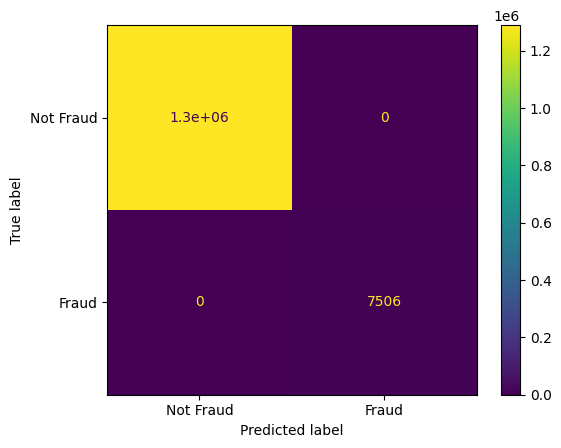

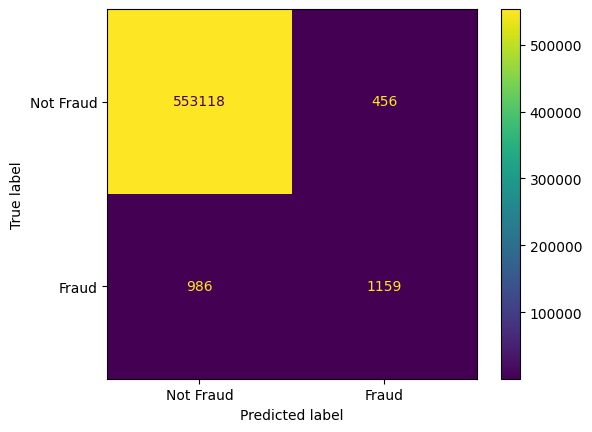

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, ada_rf_pred_train))
print("Precision Train:", precision_score(y_train, ada_rf_pred_train))
print("Recall Train:", recall_score(y_train, ada_rf_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_rf_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_rf_pred_test))
print("Precision Test:", precision_score(y_test, ada_rf_pred_test))
print("Recall Test:", recall_score(y_test, ada_rf_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_rf_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_rf_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_rf_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [192]:
xg = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [193]:
xg_pred_train = xg.predict(x_train)
xg_pred_test = xg.predict(x_test)

In [194]:
print("Classification Report Train:")
print(classification_report(y_train, xg_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, xg_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       0.80      0.54      0.65      7506

    accuracy                           1.00   1296675
   macro avg       0.90      0.77      0.82   1296675
weighted avg       1.00      1.00      1.00   1296675


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.71      0.53      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.85      0.77      0.80    555719
weighted avg       1.00      1.00      1.00    555719



Accuracy Train: 0.9965712302620163
Precision Train: 0.7989449003516998
Recall Train: 0.5447641886490807
F1 Score Train: 0.6478136882129277

Accuracy Test: 0.9973601766360337
Precision Test: 0.7105590062111802
Recall Test: 0.5333333333333333
F1 Score Test: 0.6093209054593874



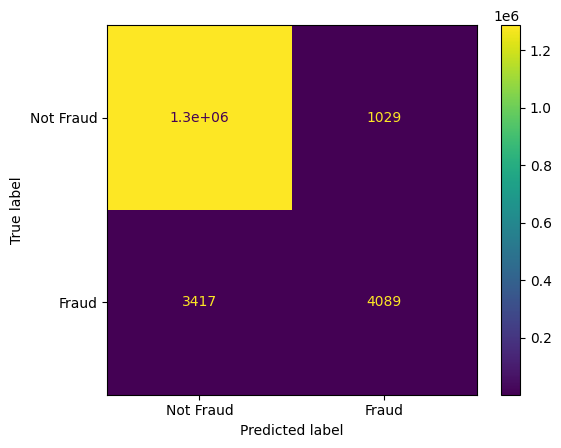

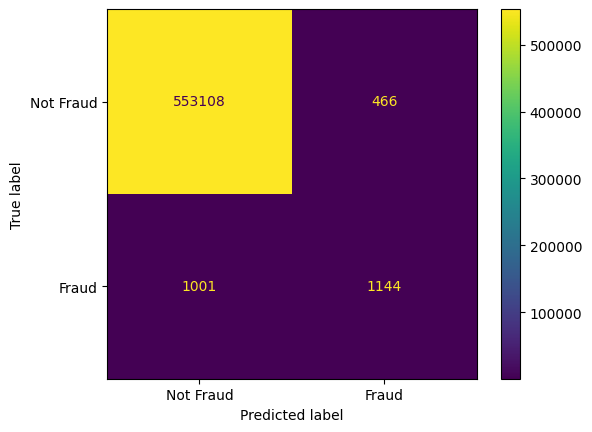

In [195]:
print("Accuracy Train:", accuracy_score(y_train, xg_pred_train))
print("Precision Train:", precision_score(y_train, xg_pred_train))
print("Recall Train:", recall_score(y_train, xg_pred_train))
print("F1 Score Train:", f1_score(y_train, xg_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, xg_pred_test))
print("Precision Test:", precision_score(y_test, xg_pred_test))
print("Recall Test:", recall_score(y_test, xg_pred_test))
print("F1 Score Test:", f1_score(y_test, xg_pred_test))

print()

cm_train = confusion_matrix(y_train, xg_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, xg_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

# Modelling dengan Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_over, y_over = ros.fit_resample(x_train, y_train)

In [ ]:
scaler = StandardScaler()
x_over_scaled = scaler.fit_transform(x_over)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lr_over = LogisticRegression()
lr_over.fit(x_over_scaled, y_over)

LogisticRegression()

In [ ]:
lr_over_pred_train = lr_over.predict(x_over_scaled)
lr_over_pred_test = lr_over.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report Train:")
print(classification_report(y_over, lr_over_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, lr_over_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85   1289169
           1       0.85      0.84      0.85   1289169

    accuracy                           0.85   2578338
   macro avg       0.85      0.85      0.85   2578338
weighted avg       0.85      0.85      0.85   2578338


Classification Report Test:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    553574
           1       0.00      1.00      0.01      2145

    accuracy                           0.00    555719
   macro avg       0.00      0.50      0.00    555719
weighted avg       0.00      0.00      0.00    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Train: 0.8486862467217254
Precision Train: 0.8529739483584333
Recall Train: 0.8426125666999439
F1 Score Train: 0.8477615993893887

Accuracy Test: 0.0038598644278853163
Precision Test: 0.0038598644278853163
Recall Test: 1.0
F1 Score Test: 0.007690046319533076



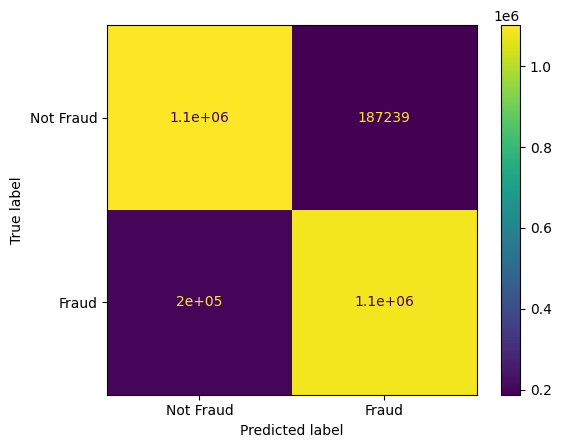

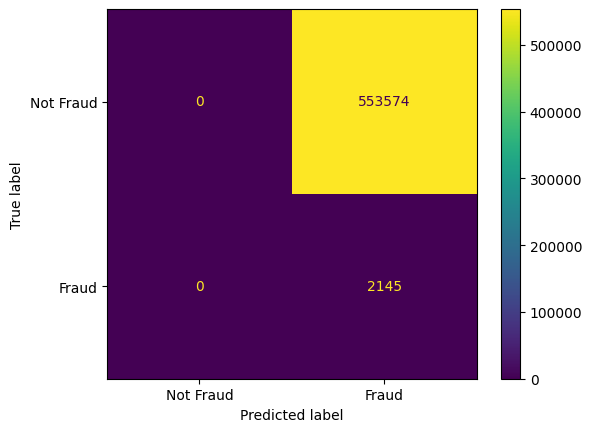

In [ ]:
print("Accuracy Train:", accuracy_score(y_over, lr_over_pred_train))
print("Precision Train:", precision_score(y_over, lr_over_pred_train))
print("Recall Train:", recall_score(y_over, lr_over_pred_train))
print("F1 Score Train:", f1_score(y_over, lr_over_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, lr_over_pred_test))
print("Precision Test:", precision_score(y_test, lr_over_pred_test))
print("Recall Test:", recall_score(y_test, lr_over_pred_test))
print("F1 Score Test:", f1_score(y_test, lr_over_pred_test))

print()

cm_train = confusion_matrix(y_over, lr_over_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, lr_over_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
rf_over = RandomForestClassifier()
rf_over.fit(x_over, y_over)

RandomForestClassifier()

In [ ]:
rf_over_pred_train = rf_over.predict(x_over)
rf_over_pred_test = rf_over.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_over, rf_over_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, rf_over_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.57      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.79      0.78    555719
weighted avg       1.00      1.00      1.00    555719



Accuracy Train: 1.0
Precision Train: 1.0
Recall Train: 1.0
F1 Score Train: 1.0

Accuracy Test: 0.9966241931623716
Precision Test: 0.5615560640732266
Recall Test: 0.5720279720279721
F1 Score Test: 0.566743648960739



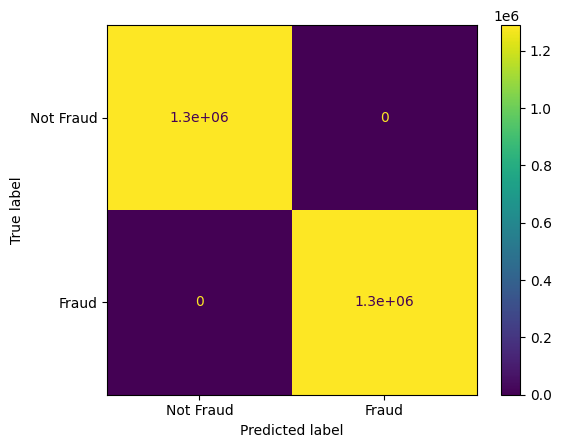

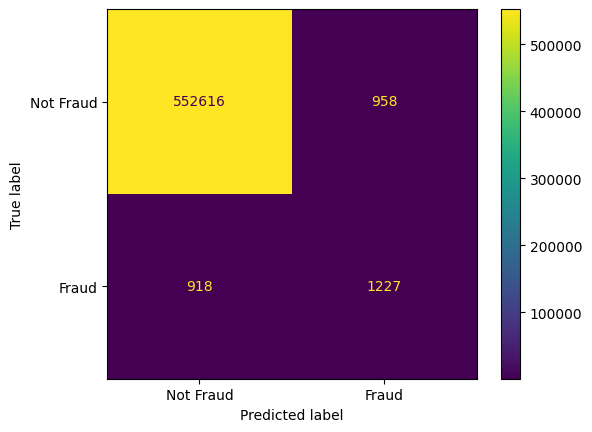

In [ ]:
print("Accuracy Train:", accuracy_score(y_over, rf_over_pred_train))
print("Precision Train:", precision_score(y_over, rf_over_pred_train))
print("Recall Train:", recall_score(y_over, rf_over_pred_train))
print("F1 Score Train:", f1_score(y_over, rf_over_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, rf_over_pred_test))
print("Precision Test:", precision_score(y_test, rf_over_pred_test))
print("Recall Test:", recall_score(y_test, rf_over_pred_test))
print("F1 Score Test:", f1_score(y_test, rf_over_pred_test))

print()

cm_train = confusion_matrix(y_over, rf_over_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, rf_over_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada_over = AdaBoostClassifier()
ada_over.fit(x_over, y_over)

AdaBoostClassifier()

In [ ]:
ada_over_pred_train = ada_over.predict(x_over)
ada_over_pred_test = ada_over.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_over, ada_over_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_over_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1289169
           1       0.93      0.92      0.93   1289169

    accuracy                           0.93   2578338
   macro avg       0.93      0.93      0.93   2578338
weighted avg       0.93      0.93      0.93   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    553574
           1       0.05      0.91      0.10      2145

    accuracy                           0.93    555719
   macro avg       0.53      0.92      0.53    555719
weighted avg       1.00      0.93      0.96    555719



Accuracy Train: 0.9283418232985745
Precision Train: 0.9337163071770681
Recall Train: 0.922145971552217
F1 Score Train: 0.9278950718535977

Accuracy Test: 0.9346234337857803
Precision Test: 0.051341277757362594
Recall Test: 0.9118881118881119
F1 Score Test: 0.0972094525756032



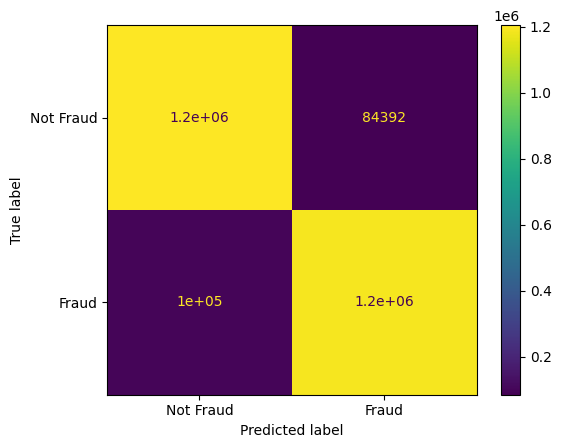

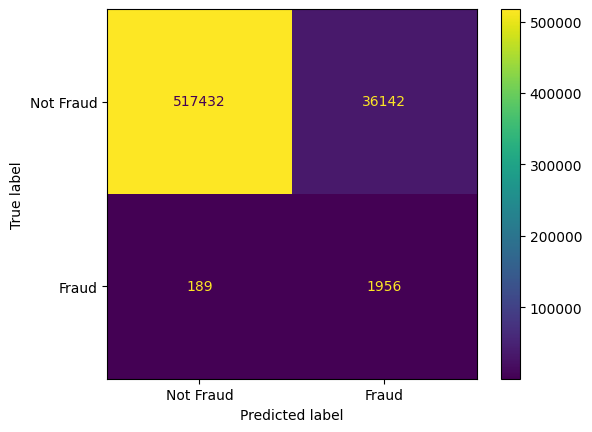

In [ ]:
print("Accuracy Train:", accuracy_score(y_over, ada_over_pred_train))
print("Precision Train:", precision_score(y_over, ada_over_pred_train))
print("Recall Train:", recall_score(y_over, ada_over_pred_train))
print("F1 Score Train:", f1_score(y_over, ada_over_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_over_pred_test))
print("Precision Test:", precision_score(y_test, ada_over_pred_test))
print("Recall Test:", recall_score(y_test, ada_over_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_over_pred_test))

print()

cm_train = confusion_matrix(y_over, ada_over_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_over_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
xg_over = XGBClassifier(objective='binary:logistic', n_estimators=50, learning_rate=0.1)
xg_over.fit(x_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_over_pred_train = xg_over.predict(x_over)
xg_over_pred_test = xg_over.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_over, xg_over_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, xg_over_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1289169
           1       0.95      0.95      0.95   1289169

    accuracy                           0.95   2578338
   macro avg       0.95      0.95      0.95   2578338
weighted avg       0.95      0.95      0.95   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.93      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.94      0.54    555719
weighted avg       1.00      0.95      0.97    555719



Accuracy Train: 0.9483973784662834
Precision Train: 0.9459073349542723
Recall Train: 0.9511894871812773
F1 Score Train: 0.9278950718535977

Accuracy Test: 0.9455030330076891
Precision Test: 0.06233669279581933
Recall Test: 0.9342657342657342
F1 Score Test: 0.11687516402764413



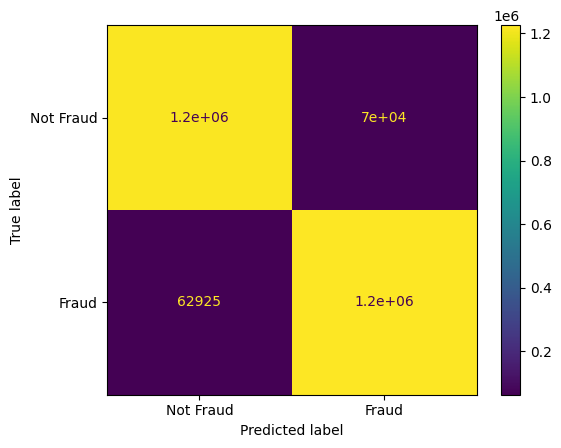

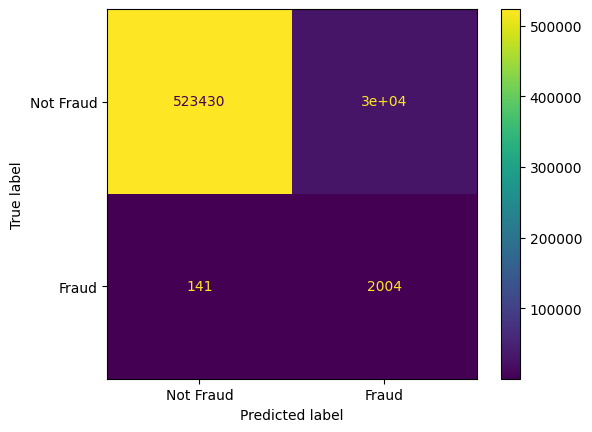

In [ ]:
print("Accuracy Train:", accuracy_score(y_over, xg_over_pred_train))
print("Precision Train:", precision_score(y_over, xg_over_pred_train))
print("Recall Train:", recall_score(y_over, xg_over_pred_train))
print("F1 Score Train:", f1_score(y_over, ada_over_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, xg_over_pred_test))
print("Precision Test:", precision_score(y_test, xg_over_pred_test))
print("Recall Test:", recall_score(y_test, xg_over_pred_test))
print("F1 Score Test:", f1_score(y_test, xg_over_pred_test))

print()

cm_train = confusion_matrix(y_over, xg_over_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, xg_over_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

# Modelling dengan Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_under, y_under = rus.fit_resample(x_train, y_train)

In [ ]:
scaler = StandardScaler()
x_under_scaled = scaler.fit_transform(x_under)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lr_under = LogisticRegression()
lr_under.fit(x_under_scaled, y_under)

LogisticRegression()

In [ ]:
lr_under_pred_train = lr_under.predict(x_under_scaled)
lr_under_pred_test = lr_under.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report Train:")
print(classification_report(y_under, lr_under_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, lr_under_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7506
           1       0.86      0.84      0.85      7506

    accuracy                           0.85     15012
   macro avg       0.85      0.85      0.85     15012
weighted avg       0.85      0.85      0.85     15012


Classification Report Test:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    553574
           1       0.00      1.00      0.01      2145

    accuracy                           0.00    555719
   macro avg       0.00      0.50      0.00    555719
weighted avg       0.00      0.00      0.00    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Train: 0.8527178257394085
Precision Train: 0.8630193336075689
Recall Train: 0.8385291766586731
F1 Score Train: 0.8505980133792824

Accuracy Test: 0.0038598644278853163
Precision Test: 0.0038598644278853163
Recall Test: 1.0
F1 Score Test: 0.007690046319533076



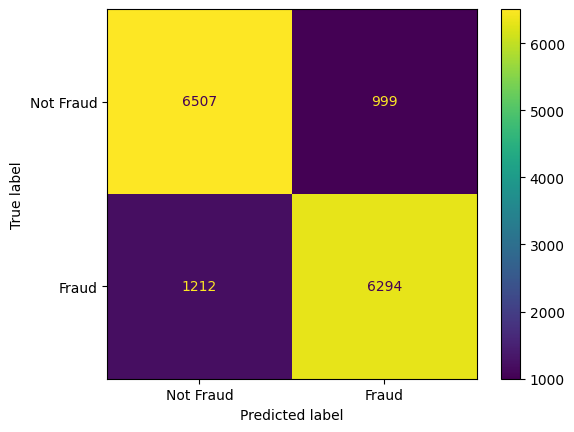

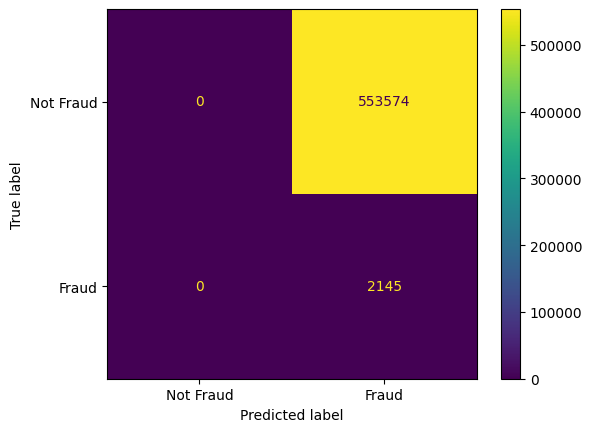

In [ ]:
print("Accuracy Train:", accuracy_score(y_under, lr_under_pred_train))
print("Precision Train:", precision_score(y_under, lr_under_pred_train))
print("Recall Train:", recall_score(y_under, lr_under_pred_train))
print("F1 Score Train:", f1_score(y_under, lr_under_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, lr_under_pred_test))
print("Precision Test:", precision_score(y_test, lr_under_pred_test))
print("Recall Test:", recall_score(y_test, lr_under_pred_test))
print("F1 Score Test:", f1_score(y_test, lr_under_pred_test))

print()

cm_train = confusion_matrix(y_under, lr_under_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, lr_under_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
rf_under = RandomForestClassifier()
rf_under.fit(x_under, y_under)

RandomForestClassifier()

In [ ]:
rf_under_pred_train = rf_under.predict(x_under)
rf_under_pred_test = rf_under.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_under, rf_under_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, rf_under_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7506
           1       1.00      1.00      1.00      7506

    accuracy                           1.00     15012
   macro avg       1.00      1.00      1.00     15012
weighted avg       1.00      1.00      1.00     15012


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.93      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.93      0.54    555719
weighted avg       1.00      0.94      0.96    555719



Accuracy Train: 1.0
Precision Train: 1.0
Recall Train: 1.0
F1 Score Train: 1.0

Accuracy Test: 0.9374288084445556
Precision Test: 0.054482890460714965
Recall Test: 0.9300699300699301
F1 Score Test: 0.10293586502244466



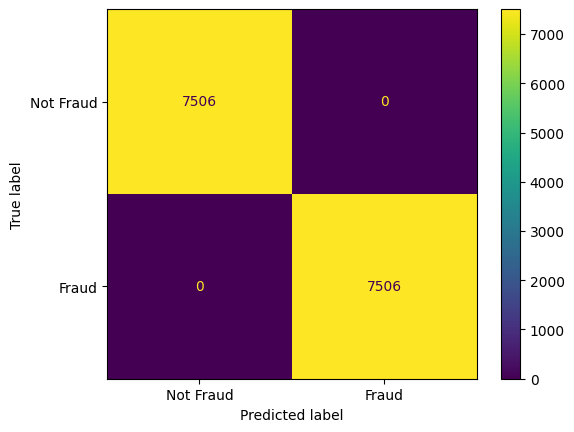

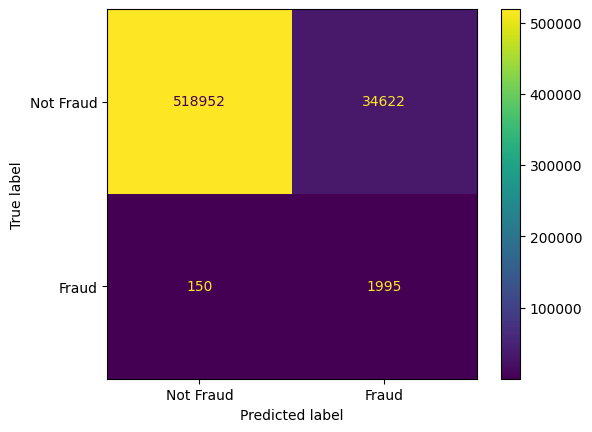

In [ ]:
print("Accuracy Train:", accuracy_score(y_under, rf_under_pred_train))
print("Precision Train:", precision_score(y_under, rf_under_pred_train))
print("Recall Train:", recall_score(y_under, rf_under_pred_train))
print("F1 Score Train:", f1_score(y_under, rf_under_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, rf_under_pred_test))
print("Precision Test:", precision_score(y_test, rf_under_pred_test))
print("Recall Test:", recall_score(y_test, rf_under_pred_test))
print("F1 Score Test:", f1_score(y_test, rf_under_pred_test))

print()

cm_train = confusion_matrix(y_under, rf_under_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, rf_under_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada_under = AdaBoostClassifier()
ada_under.fit(x_under, y_under)

AdaBoostClassifier()

In [ ]:
ada_under_pred_train = ada_under.predict(x_under)
ada_under_pred_test = ada_under.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_under, ada_under_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_under_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7506
           1       0.94      0.92      0.93      7506

    accuracy                           0.93     15012
   macro avg       0.93      0.93      0.93     15012
weighted avg       0.93      0.93      0.93     15012


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.06      0.91      0.11      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.92      0.54    555719
weighted avg       1.00      0.94      0.97    555719



Accuracy Train: 0.9314548361310951
Precision Train: 0.9441777533945961
Recall Train: 0.917132960298428
F1 Score Train: 0.9304588767993512

Accuracy Test: 0.941562192402995
Precision Test: 0.0567862988075754
Recall Test: 0.9058275058275058
F1 Score Test: 0.10687274827424989



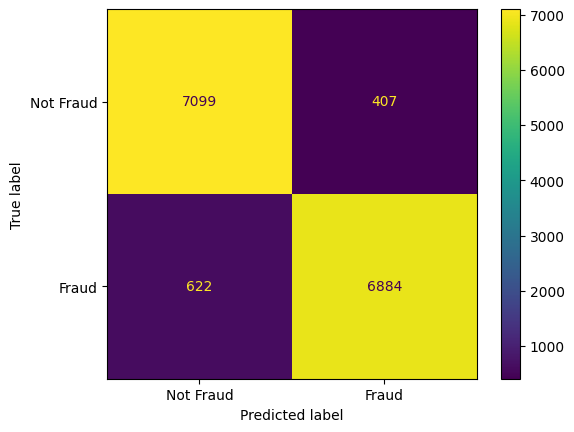

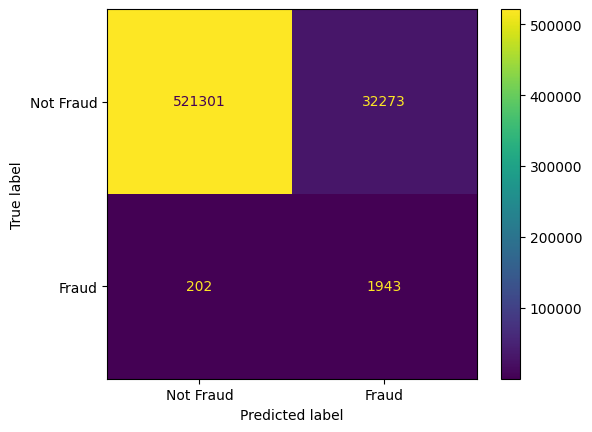

In [ ]:
print("Accuracy Train:", accuracy_score(y_under, ada_under_pred_train))
print("Precision Train:", precision_score(y_under, ada_under_pred_train))
print("Recall Train:", recall_score(y_under, ada_under_pred_train))
print("F1 Score Train:", f1_score(y_under, ada_under_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_under_pred_test))
print("Precision Test:", precision_score(y_test, ada_under_pred_test))
print("Recall Test:", recall_score(y_test, ada_under_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_under_pred_test))

print()

cm_train = confusion_matrix(y_under, ada_under_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_under_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
xg_under = XGBClassifier(objective='binary:logistic', n_estimators=50, learning_rate=0.1)
xg_under.fit(x_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_under_pred_train = xg_under.predict(x_under)
xg_under_pred_test = xg_under.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_under, xg_under_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, xg_under_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7506
           1       0.95      0.95      0.95      7506

    accuracy                           0.95     15012
   macro avg       0.95      0.95      0.95     15012
weighted avg       0.95      0.95      0.95     15012


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.06      0.94      0.11      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.94      0.54    555719
weighted avg       1.00      0.94      0.97    555719



Accuracy Train: 0.9493072208899547
Precision Train: 0.947103274559194
Recall Train: 0.9517719158006928
F1 Score Train: 0.9494318559372715

Accuracy Test: 0.9402719719858418
Precision Test: 0.05741981468282252
Recall Test: 0.938927738927739
F1 Score Test: 0.10822138635142396



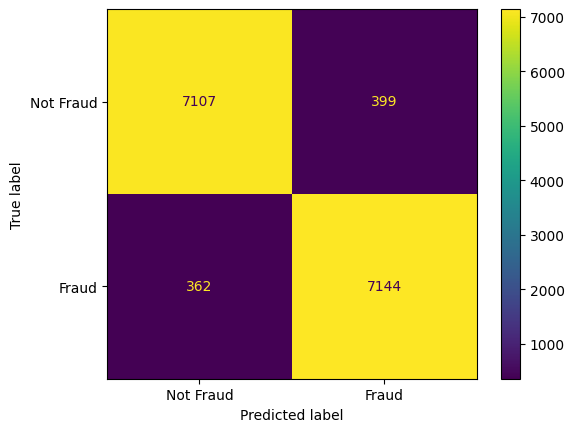

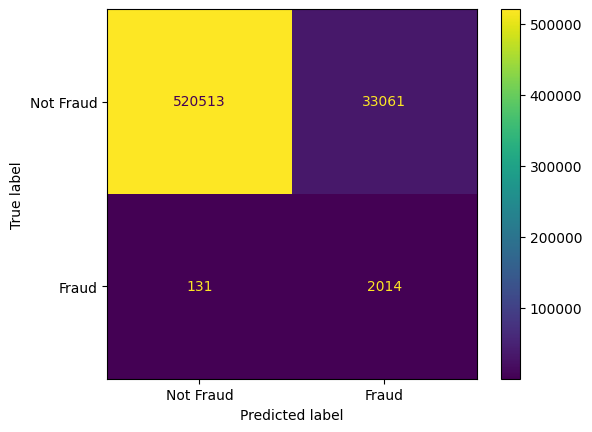

In [ ]:
print("Accuracy Train:", accuracy_score(y_under, xg_under_pred_train))
print("Precision Train:", precision_score(y_under, xg_under_pred_train))
print("Recall Train:", recall_score(y_under, xg_under_pred_train))
print("F1 Score Train:", f1_score(y_under, xg_under_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, xg_under_pred_test))
print("Precision Test:", precision_score(y_test, xg_under_pred_test))
print("Recall Test:", recall_score(y_test, xg_under_pred_test))
print("F1 Score Test:", f1_score(y_test, xg_under_pred_test))

print()

cm_train = confusion_matrix(y_under, xg_under_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, xg_under_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

# Modelling dengan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [ ]:
scaler = StandardScaler()
x_smote_scaled = scaler.fit_transform(x_smote)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lr_smote = LogisticRegression()
lr_smote.fit(x_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
lr_smote_pred_train = lr_smote.predict(x_smote_scaled)
lr_smote_pred_test = lr_smote.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Classification Report Train:")
print(classification_report(y_smote, lr_smote_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, lr_smote_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86   1289169
           1       0.88      0.83      0.86   1289169

    accuracy                           0.86   2578338
   macro avg       0.86      0.86      0.86   2578338
weighted avg       0.86      0.86      0.86   2578338


Classification Report Test:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    553574
           1       0.00      1.00      0.01      2145

    accuracy                           0.00    555719
   macro avg       0.00      0.50      0.00    555719
weighted avg       0.00      0.00      0.00    555719



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(x_smote, y_smote)

RandomForestClassifier()

In [ ]:
rf_smote_pred_train = rf_smote.predict(x_smote)
rf_smote_pred_test = rf_smote.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_smote, rf_smote_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, rf_smote_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.70      0.25      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.84      0.62    555719
weighted avg       1.00      0.98      0.99    555719



In [ ]:
ada_smote = AdaBoostClassifier()
ada_smote.fit(x_smote, y_smote)

AdaBoostClassifier()

In [ ]:
ada_smote_pred_train = ada_smote.predict(x_smote)
ada_smote_pred_test = ada_smote.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_smote, ada_smote_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_smote_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93   1289169
           1       0.93      0.92      0.93   1289169

    accuracy                           0.93   2578338
   macro avg       0.93      0.93      0.93   2578338
weighted avg       0.93      0.93      0.93   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.90      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.92      0.53    555719
weighted avg       1.00      0.94      0.96    555719



In [ ]:
xg_smote = XGBClassifier(objective='binary:logistic')
xg_smote.fit(x_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_smote_pred_train = xg_smote.predict(x_smote)
xg_smote_pred_test = xg_smote.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_smote, xg_smote_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, xg_smote_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96   1289169
           1       0.96      0.97      0.96   1289169

    accuracy                           0.96   2578338
   macro avg       0.96      0.96      0.96   2578338
weighted avg       0.96      0.96      0.96   2578338


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.88      0.14      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.92      0.56    555719
weighted avg       1.00      0.96      0.98    555719

